# Telecom Churn Prediction Modelling

#### 

**Project Description**:

The project focuses on reducing customer churn in the telecommunication industry, where companies face a 15-25% annual churn rate. It emphasizes the significance of retaining high-value customers to prevent them from switching to competitors. The objective is to analyze customer data from a leading telecom firm and build machine learning models to predict potential churn. These models aim to identify high-risk customers for proactive retention strategies through special offers or discounts. Additionally, the project seeks to determine key predictors of churn, aiding in understanding the reasons behind customers' decisions to leave. Evaluation metrics like accuracy, precision, and recall will be considered, with a focus on accurately identifying customers more likely to churn. Based on the findings, recommendations for managing customer churn will be made. 

The dataset provided includes 172 columns, with 171 predictor variables and a target variable named "churn_probability".

#### 


### Analysis Framework:

The structured approach for this analysis comprises the following stages:

**1. Preliminary Data Exploration and Cleaning**
   - Assessing the dataset's size and distribution.
   - Identifying the dataset's granularity and primary identifiers.
   - Reviewing the types of data (numerical vs. categorical) and their formats.
   - Conducting data cleaning to address format inconsistencies, irrelevant or incorrect columns.
   - Handling missing values and outliers.
   - Performing both univariate and bivariate analyses to understand single variables and their relationships.
   - Analyzing correlations and creating derived variables as needed.
   
**2. Preparation of Data for Modeling**
   - Converting categorical variables into dummy/indicator variables.
   - Applying necessary mappings to variables.
   - Standardizing features for uniform scale.

**3. Development and Assessment of Models**

This section is divided into two key parts:
1. Utilizing the cleaned and prepared features to construct initial models:
   - Establishing a basic Logistic Regression model as the baseline.
   - Developing a Decision Tree model and optimizing through hyperparameter tuning.
   - Constructing a Random Forest model, also with hyperparameter tuning.
   - Implementing an XGBoost model, with adjustments for optimal performance.
2. Building models based on Principal Component Analysis (PCA):
   - Again starting with a Logistic Regression model for baseline comparison.
   - Applying Decision Tree and Random Forest models, each with tailored hyperparameter tuning.
  
**4. Final Model Selection and Validation with Additional Test Data**

This structured analysis aims to efficiently predict customer churn and extract actionable insights for retaining high-value customers in the telecommunications industry.

## Step 1 -  Preliminary Data Exploration and Cleaning

### Importing Requried python Libraries

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
import statsmodels.api as sm

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

### Loading and Understanding the Dataset

In [8]:
### Reading csv file
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

telecom_dataset = pd.read_csv("train.csv")
telecom_dataset

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          0        109             0.0             0.0             0.0   
1          1        109             0.0             0.0             0.0   
2          2        109             0.0             0.0             0.0   
3          3        109             0.0             0.0             0.0   
4          4        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0                6/30/2014            7/31/2014            8/31/2014   31.277   
1                6/30/2014            7/31/2014            8/31/2014    0.000   
2                6/30/2014            7/31/2014            8/31/2014   60.806   
3                6/30/2014            7/31/2014            8/31/2014  156.362   
4                6/30/2014            7/31/2014            8/31/2014  240.708   
...                    ...                  ...                  ...      ...   
69994            6/30/2014            7/31/2014            8/31/2014   15.760   
69995            6/30/2014            7/31/2014            8/31/2014  160.083   
69996            6/30/2014            7/31/2014            8/31/2014  372.088   
69997            6/30/2014            7/31/2014            8/31/2014  238.575   
69998            6/30/2014            7/31/2014            8/31/2014  168.269   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0       87.009    7.527        48.58       124.38         1.29         32.24   
1      122.787   42.953         0.00         0.00         0.00          0.00   
2      103.176    0.000         0.53        15.93         0.00         53.99   
3      205.260  111.095         7.26        16.01         0.00         68.76   
4      128.191  101.565        21.28         4.83         6.13         56.99   
...        ...      ...          ...          ...          ...           ...   
69994  410.924  329.136         0.00         7.36        10.93          0.00   
69995  289.129  265.772       116.54       196.46       232.63         49.53   
69996  258.374  279.782        77.13        68.44        78.44        335.54   
69997  245.414  145.062        14.01         7.64         6.71         30.34   
69998   42.815  167.961         0.00         0.00         0.00          0.00   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0             96.68          2.33           0.00            0.0   
1             25.99         30.89           0.00            0.0   
2             82.05          0.00           0.00            0.0   
3             78.48         50.23           0.00            0.0   
4             38.11          9.63          53.64            0.0   
...             ...           ...            ...            ...   
69994        488.46        381.64          14.96            0.0   
69995         96.28         48.06           0.00            0.0   
69996        227.94        263.84           0.00            0.0   
69997         16.68         12.56          25.06            0.0   
69998          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0                0.0           0.00            0.0           0.00   
1                0.0           0.00            0.0           0.00   
2                0.0           0.00            0.0           0.00   
3                0.0           0.00            0.0           1.63   
4                0.0     

### List Total Number of rows and columns in the dataset

In [9]:
telecom_dataset.shape


(69999, 172)

In [10]:
telecom_dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Examine the Data Visually

In [11]:
telecom_dataset.head(10)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   
5   5        109             0.0             0.0             0.0   
6   6        109             0.0             0.0             0.0   
7   7        109             0.0             0.0             0.0   
8   8        109             0.0             0.0             0.0   
9   9        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   
5            6/30/2014            7/31/2014            8/31/2014   86.193   
6            6/30/2014            7/31/2014            8/31/2014   54.173   
7            6/30/2014            7/31/2014            8/31/2014  167.861   
8            6/30/2014            7/31/2014            8/31/2014  163.550   
9            6/30/2014            7/31/2014            8/31/2014  101.984   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   
5   83.351   88.462         1.39         1.78         0.45         17.14   
6   95.130    6.386        38.81        40.56        19.61         31.63   
7  167.869  167.866         0.00         0.00         0.00          0.00   
8   90.250   51.726         0.00         0.00         0.00         47.81   
9  259.265   65.686        27.49       111.78        53.38        110.51   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00           0.00           0.00   
1         25.99         30.89           0.00           0.00           0.00   
2         82.05          0.00           0.00           0.00           0.00   
3         78.48         50.23           0.00           0.00           0.00   
4         38.11          9.63          53.64           0.00           0.00   
5         24.26          3.44           0.00           0.00           0.00   
6         54.18          5.69           0.00           0.00           0.00   
7          0.00          0.00           0.00           0.00           0.00   
8         50.88         21.74          28.26          11.31          47.81   
9        124.04         85.54           0.00           7.23           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              2.23   
1           0.00           0.00           0.00              0.00   
2           0.00           0.00           0.00              0.53   
3           0.00           0.00           1.63              6.99   
4          15.73           0.00           0.00             10.16   
5           0.00           0.00           0.00              1.39   
6           0.00           0.00           0.00             38.81   
7           0.00           0.00           0.00              0.00   
8          47.81          50.88          21.74              0.00   
9           0.00          32.2

In [12]:
telecom_dataset.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

The dataset consists of 69,999 entries and 172 columns, with the target variable positioned in the last column. The majority of the columns are numerical, except for nine columns that contain date information. It appears that the data is organized at the level of individual IDs.

In [13]:
# Examining the Dataset for Unique Identifiers
print(telecom_dataset.shape[0])
print(telecom_dataset['id'].drop_duplicates().count())

69999
69999


### Data Overview

Upon reviewing the data dictionary and initial observations of the dataset, it is evident that the data encompasses a wide array of metrics related to customer spending and behavior. These metrics include, but are not limited to, the average revenue per user, minutes of usage categorized by distance, the balance of incoming versus outgoing calls, frequency and amount of recharges, and data consumption patterns.

Several metrics are composite, meaning they are calculated as totals of other specific metrics. For instance, 'loc_og_mou' represents the total of all local outgoing minutes, as derived from various 'loc_og' categories. Similarly, 'total_og_mou' aggregates the minutes spent on local, STD, ISD, and other forms of outgoing calls. This pattern of aggregation is observed across various metrics. Furthermore, there's a noticeable interconnection among certain metrics, such as call minutes, recharge amounts, and average revenue per user (ARPU).

In the subsequent stages of our analysis, we plan to refine the dataset by addressing these instances of redundant data and closely examining the correlations to streamline the modeling process.

### Distinguishing Between Categorical and Numerical Columns
For the purpose of tailored analysis and modeling, it's crucial to differentiate between categorical and numerical columns within the dataset. Upon consulting the data dictionary and conducting a preliminary inspection of the dataset, it becomes clear that only two columns are categorical in nature, namely 'night_pck_user' and 'fb_user'. The remainder of the dataset is comprised of numerical columns, including some that represent dates.

### Data Cleaning & Preparation

#### Checking And Removing Duplicate Entries

In [14]:
print(telecom_dataset.shape)
telecom_cleaned = telecom_dataset.drop_duplicates()
print(telecom_cleaned.shape)

(69999, 172)


(69999, 172)


#### Removing Non-Essential Columns

In [15]:
# Displaying the shape before and after removing specific columns
print("Shape before column removal:", telecom_cleaned.shape)

# Dropping ID-type columns
telecom_cleaned = telecom_cleaned.drop(['id', 'circle_id'], axis=1)

# Removing columns related to the last date of months
telecom_cleaned = telecom_cleaned.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1)

# Excluding columns with only one value across all rows (e.g., zeros)
telecom_cleaned = telecom_cleaned.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1)
telecom_cleaned = telecom_cleaned.drop(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'], axis=1)
telecom_cleaned = telecom_cleaned.drop(['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)

# Dropping date columns for monthly recharges and data recharges, as counts and amounts are retained
telecom_cleaned = telecom_cleaned.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
telecom_cleaned = telecom_cleaned.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1)

print("Shape after column removal:", telecom_cleaned.shape)


Shape before column removal: (69999, 172)
Shape after column removal: (69999, 152)


Upon reviewing each column, no issues with junk data, incorrect formatting, or inaccurate information were identified. Therefore, we'll move forward with addressing missing values.

### Examining Missing Entries

In [16]:
# Calculating the percentage of missing values for each column
missing_percentage = (telecom_cleaned.isnull().sum() / telecom_cleaned.shape[0]) * 100
print(round(missing_percentage, 3))

arpu_6                 0.000
arpu_7                 0.000
arpu_8                 0.000
onnet_mou_6            3.954
onnet_mou_7            3.839
onnet_mou_8            5.290
offnet_mou_6           3.954
offnet_mou_7           3.839
offnet_mou_8           5.290
roam_ic_mou_6          3.954
roam_ic_mou_7          3.839
roam_ic_mou_8          5.290
roam_og_mou_6          3.954
roam_og_mou_7          3.839
roam_og_mou_8          5.290
loc_og_t2t_mou_6       3.954
loc_og_t2t_mou_7       3.839
loc_og_t2t_mou_8       5.290
loc_og_t2m_mou_6       3.954
loc_og_t2m_mou_7       3.839
loc_og_t2m_mou_8       5.290
loc_og_t2f_mou_6       3.954
loc_og_t2f_mou_7       3.839
loc_og_t2f_mou_8       5.290
loc_og_t2c_mou_6       3.954
loc_og_t2c_mou_7       3.839
loc_og_t2c_mou_8       5.290
loc_og_mou_6           3.954
loc_og_mou_7           3.839
loc_og_mou_8           5.290
std_og_t2t_mou_6       3.954
std_og_t2t_mou_7       3.839
std_og_t2t_mou_8       5.290
std_og_t2m_mou_6       3.954
std_og_t2m_mou

The data indicates that several columns contain missing values, which predominantly fall into two categories: relatively low missing percentages (approximately up to 5%) and significantly high missing percentages (exceeding 70%). 

Based on this observation, we plan to eliminate any columns from our dataset that have more than 50% missing values.

In [17]:
# Identifying columns to drop based on missing value threshold
columns_to_drop = telecom_cleaned.columns[(100 * (telecom_cleaned.isnull().sum() / telecom_cleaned.shape[0])) > 50]
print("Number of columns with high missing values:", len(columns_to_drop))
print("\nColumns marked for removal include:\n")
print(columns_to_drop)

Number of columns with high missing values: 27

Columns marked for removal include:

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')


The columns listed above display a notably consistent percentage of missing values, which likely stems from their related characteristics and mutual connections.

In [18]:
# Removing the specified columns with high missing values
telecom_cleaned = telecom_cleaned.drop(columns_to_drop, axis=1)
print("New shape of the dataset:", telecom_cleaned.shape)

New shape of the dataset: (69999, 125)


In [19]:
# Identifying columns with low percentages of missing values
small_missing_value_cols = telecom_cleaned.columns[(telecom_cleaned.isnull().sum() > 0) & (telecom_cleaned.isnull().sum() / telecom_cleaned.shape[0] * 100 < 50)]
print("Count of columns with small missing value percentages:", len(small_missing_value_cols))
print("\nColumns that require missing value treatment:\n")
print(small_missing_value_cols)

Count of columns with small missing value percentages: 81

Columns that require missing value treatment:

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_

Upon visual inspection of the dataset, there were no observed issues with formatting or misalignment of data that might have led to the missing values.

Given that the columns in question are numerical and predominantly populated with zeros, using the mean for imputation would not be appropriate. Therefore, we will proceed with median imputation for these values.

In [20]:
telecom_cleaned[small_missing_value_cols].describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
mean     133.153275    133.894438    132.978257    198.874771    197.153383   
std      299.963093    311.277193    311.896596    316.818355    322.482226   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.410000      6.675000      6.410000     34.860000     32.240000   
50%       34.110000     32.280000     32.100000     96.480000     91.885000   
75%      119.390000    115.837500    115.060000    232.990000    227.630000   
max     7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  66296.000000   67231.000000   67312.000000   66296.000000   
mean     196.543577       9.765435       7.014568       7.004892   
std      324.089234      57.374429      55.960985      53.408135   
min        0.000000       0.000000       0.000000       0.000000   
25%       31.575000       0.000000       0.000000       0.000000   
50%       91.800000       0.000000       0.000000       0.000000   
75%      229.345000       0.000000       0.000000       0.000000   
max    14007.340000    2850.980000    4155.830000    4169.810000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   67231.000000   67312.000000   66296.000000      67231.000000   
mean       14.186457       9.842191       9.771783         46.904854   
std        73.469261      58.511894      64.618388        150.971758   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          1.660000   
50%         0.000000       0.000000       0.000000         11.910000   
75%         0.000000       0.000000       0.000000         40.740000   
max      3775.110000    2812.040000    5337.040000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      67312.000000      66296.000000      67231.000000      67312.000000   
mean          46.166503         45.686109         93.238231         90.799240   
std          154.739002        153.716880        162.046699        153.852597   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.650000          1.610000          9.920000         10.090000   
50%           11.580000         11.740000         41.030000         40.170000   
75%           39.760000         39.895000        110.430000        107.540000   
max         7400.660000      10752.560000       4696.830000       4557.140000   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          91.121447          3.743179          3.777031          3.661652   
std          152.997805         13.319542         13.568110         13.009193   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.830000          0.000000          0.000000          0.000000   
50%           40.350000          0.000000          0.000000          0.000000   
75%          109.245000          2.060000          2.080000          2.030000   
max         4961.330000        617.580000        815.330000        588.290000   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
count      67231.000000      67312.000000      66296.000000  67231.000000   
mean           1.126025          1.361052          1.420840    143.893585   
std            5.741811          7.914113          6.542202    252.034597   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000     17.235000   
50%            0.000000          0.000000          0.000000     65.190000   
75%            0.000000          0.

In [21]:
# Filling in missing values with the median for each column
for column in small_missing_value_cols:
    telecom_cleaned[column] = telecom_cleaned[column].fillna(telecom_cleaned[column].median())

# Verifying that there are no more missing values
missing_values_after_imputation = telecom_cleaned.isnull().sum()
missing_values_after_imputation


arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

In [22]:
telecom_cleaned.shape

(69999, 125)

All missing values have been addressed. We can now move on to the subsequent steps in our analysis.

The dataset now comprises 125 columns, including one target variable.

### Formulation of Derived Metrics

Having completed the data cleaning process, we're now poised to develop some additional metrics. These new metrics will aid in conducting both univariate and bivariate analyses and will be instrumental in addressing outliers as we progress further in our analysis.

We plan to introduce the following features, which we believe could serve as predictors of churn:
 - Total minutes of usage
 - Ratio of incoming to outgoing usage minutes
 - Average recharge amount
 - Ratio of August metrics to those of other months, covering:
    - Incoming minutes of usage
    - Outgoing minutes of usage
    - Number of recharges
    - Average revenue per user (ARPU)

In [23]:
# Calculating the total minutes of usage across all types of calls
telecom_cleaned['total_minutes_6'] = telecom_cleaned['total_og_mou_6'] + telecom_cleaned['total_ic_mou_6']
telecom_cleaned['total_minutes_7'] = telecom_cleaned['total_og_mou_7'] + telecom_cleaned['total_ic_mou_7']
telecom_cleaned['total_minutes_8'] = telecom_cleaned['total_og_mou_8'] + telecom_cleaned['total_ic_mou_8']

# Establishing the ratio of incoming to outgoing calls
telecom_cleaned['incoming_outgoing_ratio_6'] = telecom_cleaned['total_ic_mou_6'] / telecom_cleaned['total_og_mou_6']
telecom_cleaned['incoming_outgoing_ratio_7'] = telecom_cleaned['total_ic_mou_7'] / telecom_cleaned['total_og_mou_7']
telecom_cleaned['incoming_outgoing_ratio_8'] = telecom_cleaned['total_ic_mou_8'] / telecom_cleaned['total_og_mou_8']

# Computing the average recharge amount
telecom_cleaned['average_recharge_6'] = telecom_cleaned['total_rech_amt_6'] / telecom_cleaned['total_rech_num_6']
telecom_cleaned['average_recharge_7'] = telecom_cleaned['total_rech_amt_7'] / telecom_cleaned['total_rech_num_7']
telecom_cleaned['average_recharge_8'] = telecom_cleaned['total_rech_amt_8'] / telecom_cleaned['total_rech_num_8']

# Creating metrics to compare August with the average of June and July
telecom_cleaned['august_ic_mou_change'] = telecom_cleaned['total_ic_mou_8'] / np.mean([telecom_cleaned['total_ic_mou_6'], telecom_cleaned['total_ic_mou_7']])
telecom_cleaned['august_og_mou_change'] = telecom_cleaned['total_og_mou_8'] / np.mean([telecom_cleaned['total_og_mou_6'], telecom_cleaned['total_og_mou_7']])
telecom_cleaned['august_rech_num_change'] = telecom_cleaned['total_rech_num_8'] / np.mean([telecom_cleaned['total_rech_num_6'], telecom_cleaned['total_rech_num_7']])
telecom_cleaned['august_arpu_change'] = telecom_cleaned['arpu_8'] / np.mean([telecom_cleaned['arpu_6'], telecom_cleaned['arpu_7']])

# Inspecting for null or infinite values after creating new metrics

print("Null or NA values in the new columns: \n")
print(telecom_cleaned.isnull().sum())

print("\nChecking for infinite values that may have resulted from division by zero:\n")
print((telecom_cleaned == np.inf).sum() + (telecom_cleaned == -np.inf).sum())

Null or NA values in the new columns: 

arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                     0
onnet_mou_7                     0
onnet_mou_8                     0
offnet_mou_6                    0
offnet_mou_7                    0
offnet_mou_8                    0
roam_ic_mou_6                   0
roam_ic_mou_7                   0
roam_ic_mou_8                   0
roam_og_mou_6                   0
roam_og_mou_7                   0
roam_og_mou_8                   0
loc_og_t2t_mou_6                0
loc_og_t2t_mou_7                0
loc_og_t2t_mou_8                0
loc_og_t2m_mou_6                0
loc_og_t2m_mou_7                0
loc_og_t2m_mou_8                0
loc_og_t2f_mou_6                0
loc_og_t2f_mou_7                0
loc_og_t2f_mou_8                0
loc_og_t2c_mou_6                0
loc_og_t2c_mou_7                0
loc_og_t2c_mou_8                0
loc_og_mou_6                    0
loc_og_m

From the checks conducted, it's observed that some of the newly created metrics contain missing and infinite values. 
1. The occurrence of missing values can be attributed to instances where both the numerator and denominator were zero. In these cases, we'll fill the missing values with zeros.
2. Infinite values arise when the denominator is zero, indicating situations where customers had incoming calls but no outgoing calls. To address this, we'll replace infinite values with zeros and also introduce an indicator column. This column will mark with a 1 those instances where there were exclusively incoming calls and no outgoing calls.

In [24]:
# List of newly named columns that might contain missing values
new_columns_for_imputation = [
    'average_recharge_6', 'average_recharge_7', 'average_recharge_8',
    'incoming_outgoing_ratio_6', 'incoming_outgoing_ratio_7', 'incoming_outgoing_ratio_8'
]

# Imputing missing values with zeros for these specific columns
for column in new_columns_for_imputation:
    telecom_cleaned[column] = telecom_cleaned[column].fillna(0)

In [25]:
# Imputing infinite values with zeros and creating an indicator for customers with only incoming calls
telecom_cleaned['only_incoming_calls_indicator_6'] = 0
telecom_cleaned.loc[telecom_cleaned['incoming_outgoing_ratio_6'] == np.inf, 'only_incoming_calls_indicator_6'] = 1
telecom_cleaned.loc[telecom_cleaned['incoming_outgoing_ratio_6'] == np.inf, 'incoming_outgoing_ratio_6'] = 0

telecom_cleaned['only_incoming_calls_indicator_7'] = 0
telecom_cleaned.loc[telecom_cleaned['incoming_outgoing_ratio_7'] == np.inf, 'only_incoming_calls_indicator_7'] = 1
telecom_cleaned.loc[telecom_cleaned['incoming_outgoing_ratio_7'] == np.inf, 'incoming_outgoing_ratio_7'] = 0

telecom_cleaned['only_incoming_calls_indicator_8'] = 0
telecom_cleaned.loc[telecom_cleaned['incoming_outgoing_ratio_8'] == np.inf, 'only_incoming_calls_indicator_8'] = 1
telecom_cleaned.loc[telecom_cleaned['incoming_outgoing_ratio_8'] == np.inf, 'incoming_outgoing_ratio_8'] = 0

# Displaying the value counts for the new indicator columns
print(telecom_cleaned['only_incoming_calls_indicator_6'].value_counts())
print("\n")
print(telecom_cleaned['only_incoming_calls_indicator_7'].value_counts())
print("\n")
print(telecom_cleaned['only_incoming_calls_indicator_8'].value_counts())


only_incoming_calls_indicator_6
0    68375
1     1624
Name: count, dtype: int64


only_incoming_calls_indicator_7
0    68352
1     1647
Name: count, dtype: int64


only_incoming_calls_indicator_8
0    68199
1     1800
Name: count, dtype: int64


In [26]:
# Verifying the new column values for any remaining null or infinite values

print("Checking for Null or NA values: \n")
print(telecom_cleaned.isnull().sum())

print("\nChecking for Infinite values resulting from division by zero:\n")
print((telecom_cleaned == np.inf).sum() + (telecom_cleaned == -np.inf).sum())

Checking for Null or NA values: 

arpu_6                             0
arpu_7                             0
arpu_8                             0
onnet_mou_6                        0
onnet_mou_7                        0
onnet_mou_8                        0
offnet_mou_6                       0
offnet_mou_7                       0
offnet_mou_8                       0
roam_ic_mou_6                      0
roam_ic_mou_7                      0
roam_ic_mou_8                      0
roam_og_mou_6                      0
roam_og_mou_7                      0
roam_og_mou_8                      0
loc_og_t2t_mou_6                   0
loc_og_t2t_mou_7                   0
loc_og_t2t_mou_8                   0
loc_og_t2m_mou_6                   0
loc_og_t2m_mou_7                   0
loc_og_t2m_mou_8                   0
loc_og_t2f_mou_6                   0
loc_og_t2f_mou_7                   0
loc_og_t2f_mou_8                   0
loc_og_t2c_mou_6                   0
loc_og_t2c_mou_7                   0
loc_

### Managing Outliers in the Dataset

Let's create boxplots for each column to visualize and assess the presence of outliers.

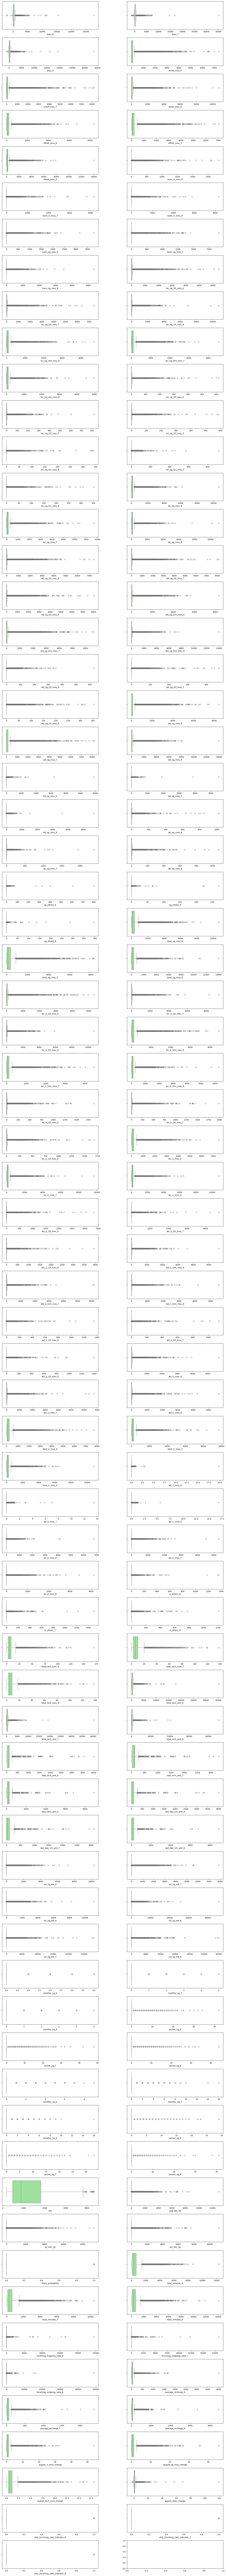

In [27]:
col_boxplot = telecom_cleaned.columns 
num_cols = len(col_boxplot)
num_rows = num_cols // 2 if num_cols % 2 == 0 else (num_cols // 2) + 1

fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 3.3))

for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(x=telecom_cleaned[col], ax=axes[i, j], color='lightgreen')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

The examination of boxplots reveals that outliers are present across nearly all columns. However, the decision to remove outliers from every column must be approached with caution due to the unique nature of the data. Here's why:

1. Many columns capture very specific metrics relevant only to certain segments of customers, such as roaming usage (roam_ic_mou, roam_og_mou), local and STD call minutes (loc_og_t2t_mou, std_ic_t2t_mou, std_ic_t2m_mou, std_ic_t2f_mou), and other similar metrics. Eliminating outliers from these columns could lead to the loss of significant insights.

2. Additionally, there are columns representing counts, like the number of 2G or 3G packs used (monthly_2g, sachet_2g, monthly_3g, sachet_3g), which contain discrete values ranging from 0 to higher but small numbers. For these types of data, applying outlier treatment is not practical.

Instead, our focus should shift towards addressing outliers in major aggregate columns that are relevant to all customers. These columns offer a comprehensive overview of the data's distribution. By concentrating on outlier treatment for these specific columns, we can refine our dataset appropriately for further analysis.

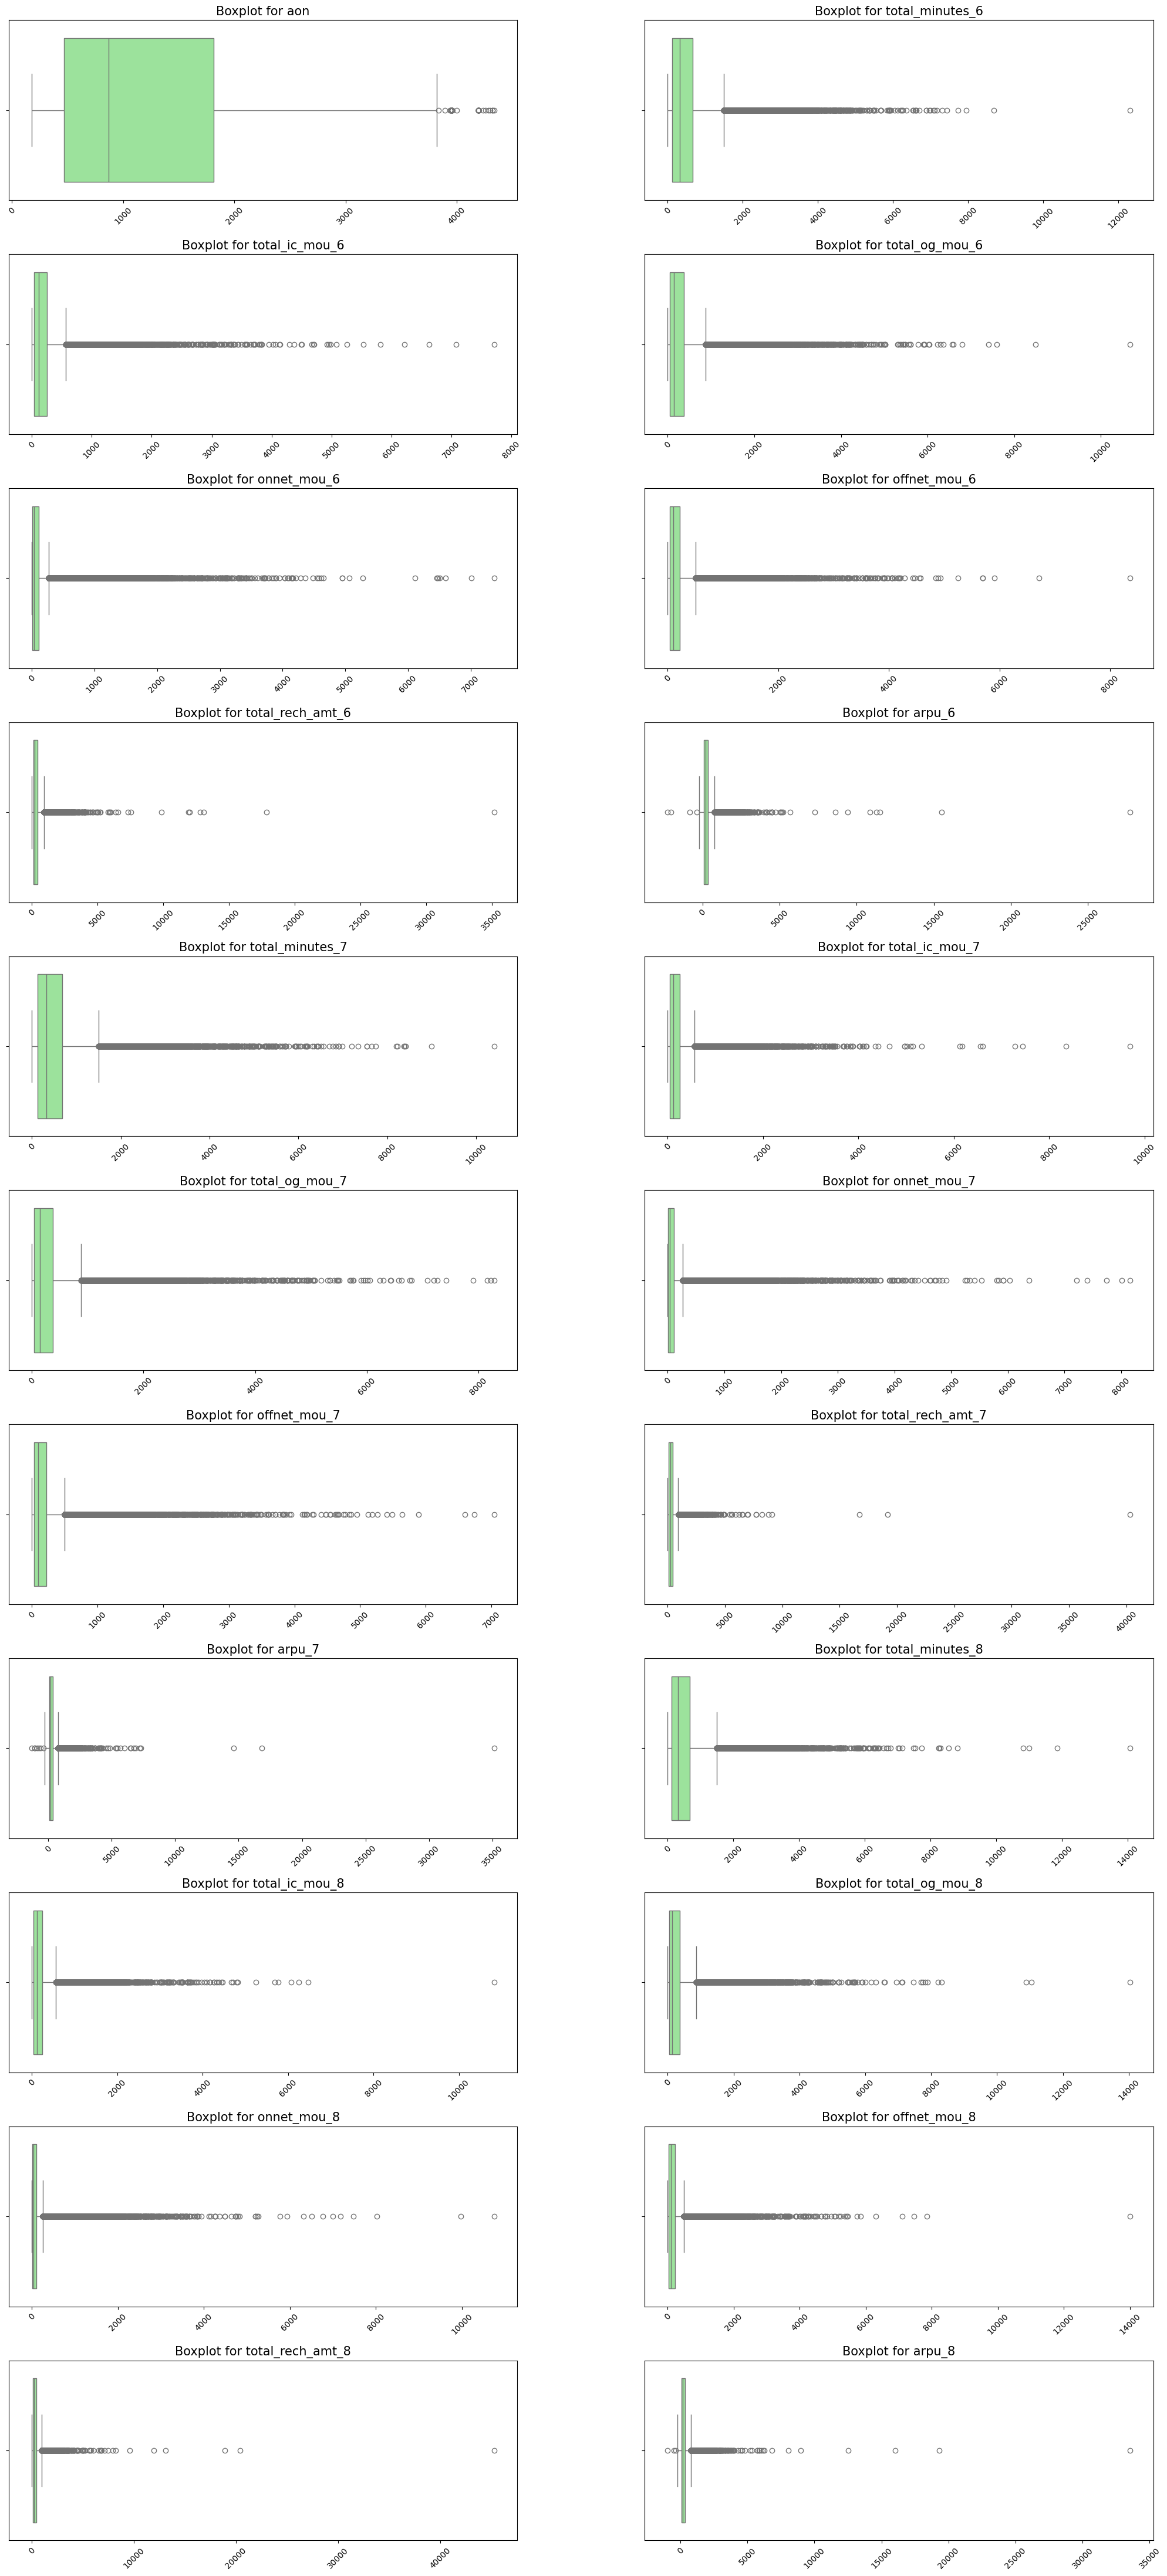

In [28]:
key_cols = [
    'aon', 'total_minutes_6', 'total_ic_mou_6', 'total_og_mou_6',
    'onnet_mou_6', 'offnet_mou_6', 'total_rech_amt_6', 'arpu_6',
    'total_minutes_7', 'total_ic_mou_7', 'total_og_mou_7',
    'onnet_mou_7', 'offnet_mou_7', 'total_rech_amt_7', 'arpu_7',
    'total_minutes_8', 'total_ic_mou_8', 'total_og_mou_8',
    'onnet_mou_8', 'offnet_mou_8', 'total_rech_amt_8', 'arpu_8'
]

num_cols = 2
num_rows = len(key_cols) // num_cols + (len(key_cols) % num_cols > 0)

# Setting up the figure for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()
for index, col in enumerate(key_cols):
    sns.boxplot(x=telecom_cleaned[col], ax=axes[index], color='lightgreen')
    axes[index].set_title(f"Boxplot for {col}", fontsize=15)
    axes[index].set_xlabel('')
    axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()

In [29]:
# Using the 'describe' method to get a statistical summary for the key columns in the 'telecom_cleaned' DataFrame
descriptive_stats = telecom_cleaned[key_cols].describe(percentiles=[0.0, 0.1, 0.2, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

print(descriptive_stats)

                aon  total_minutes_6  total_ic_mou_6  total_og_mou_6  \
count  69999.000000     69999.000000    69999.000000    69999.000000   
mean    1220.639709       506.162076      199.710640      306.451436   
std      952.426321       603.025457      290.114823      465.502866   
min      180.000000         0.000000        0.000000        0.000000   
0%       180.000000         0.000000        0.000000        0.000000   
10%      286.000000         9.674000        2.160000        0.000000   
20%      401.000000        86.530000       26.130000       28.172000   
25%      468.000000       122.790000       38.640000       44.780000   
50%      868.000000       321.910000      114.780000      145.280000   
75%     1813.000000       668.365000      251.070000      374.305000   
80%     2239.400000       789.248000      298.560000      464.642000   
90%     2792.000000      1196.886000      467.030000      785.230000   
95%     3108.000000      1661.334000      668.240000     1171.18

The analysis of the boxplots and descriptive statistics table provides the following insights:

1. The 'aon' column, representing account tenure, does not exhibit outliers, indicating a uniform distribution across the dataset.
2. The 'total_mou' columns for each of the three months effectively highlight the presence of outliers. Addressing outliers in these columns should also mitigate outlier concerns in other 'mou' type columns.
3. Outliers are also identified in the 'total_rech_amt' and 'arpu' columns for all three months, suggesting variability in recharge amounts and average revenue per user.
4. A common characteristic across these columns is that outliers primarily appear beyond the 99th percentile. There's a consistent trend up to the 99th percentile, followed by a significant increase in maximum values.
5. Based on these observations, we plan to remove outliers exceeding the 99th percentile for these specified columns, ensuring a minimal loss of data while enhancing dataset integrity.

In [30]:
telecom_cleaned.shape

(69999, 141)

In [31]:
# Creating a new copy of the dataset for outlier treatment, now using the name telecom_final for clarity
telecom_final = telecom_cleaned.copy()

# Removing outliers explicitly based on specified 99th percentile values, using the updated column names
telecom_final = telecom_final[telecom_final['total_minutes_6'] < 2845]
telecom_final = telecom_final[telecom_final['total_rech_amt_6'] < 1683]
telecom_final = telecom_final[telecom_final['arpu_6'] < 1400]
telecom_final = telecom_final[telecom_final['total_minutes_7'] < 2901]
telecom_final = telecom_final[telecom_final['total_rech_amt_7'] < 1712]
telecom_final = telecom_final[telecom_final['arpu_7'] < 1415]
telecom_final = telecom_final[telecom_final['total_minutes_8'] < 2836]
telecom_final = telecom_final[telecom_final['total_rech_amt_8'] < 1706]
telecom_final = telecom_final[telecom_final['arpu_8'] < 1445]

# Displaying the shape of the dataset after outlier removal to ensure consistency with the updated process
print("Shape of the dataset after outlier removal:", telecom_final.shape)


Shape of the dataset after outlier removal: (67668, 141)


In [32]:
round(((69999-67668)/69999)*100,2)

3.33

The data reduction resulted in only a 3.3% loss, which is a reasonable amount.

In [33]:
telecom_final[key_cols].describe(percentiles=[0, 0.1, 0.2, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])


aon  total_minutes_6  total_ic_mou_6  total_og_mou_6  \
count  67668.000000     67668.000000    67668.000000    67668.000000   
mean    1221.828324       455.539017      185.108202      270.430815   
std      952.865194       473.058560      236.197106      358.519626   
min      180.000000         0.000000        0.000000        0.000000   
0%       180.000000         0.000000        0.000000        0.000000   
10%      287.000000         9.187000        2.080000        0.000000   
20%      401.000000        84.164000       25.580000       27.184000   
25%      468.000000       119.697500       37.737500       43.387500   
50%      870.000000       310.770000      111.585000      139.390000   
75%     1818.000000       633.497500      241.695000      350.522500   
80%     2241.000000       741.300000      287.072000      431.602000   
90%     2793.600000      1090.349000      441.669000      708.575000   
95%     3109.000000      1443.238000      621.368000     1017.462000   
99%     3651.000000      2194.443300     1148.377800     1734.138500   
max     4337.000000      2841.590000     2812.010000     2797.110000   

        onnet_mou_6  offnet_mou_6  total_rech_amt_6        arpu_6  \
count  67668.000000  67668.000000      67668.000000  67668.000000   
mean     112.413812    173.534679        293.371623    254.212329   
std      226.156938    240.906460        273.980755    227.422721   
min        0.000000      0.000000          0.000000   -209.465000   
0%         0.000000      0.000000          0.000000   -209.465000   
10%        0.310000      7.580000          0.000000     31.134900   
20%        4.510000     25.930000         76.000000     72.878000   
25%        7.690000     35.660000        101.000000     91.161500   
50%       34.110000     96.480000        220.000000    191.066500   
75%      104.915000    209.745000        411.000000    350.912500   
80%      141.020000    257.572000        476.000000    404.132800   
90%      297.890000    426.083000        666.000000    563.361600   
95%      527.990000    629.655000        860.000000    724.213600   
99%     1166.881800   1203.707000       1233.000000   1033.773530   
max     2711.380000   2690.840000       1682.000000   1397.426000   

       total_minutes_7  total_ic_mou_7  total_og_mou_7   onnet_mou_7  \
count     67668.000000    67668.000000    67668.000000  67668.000000   
mean        457.205230      186.487285      270.717945    111.394506   
std         474.050374      238.934593      360.528909    228.002483   
min           0.000000        0.000000        0.000000      0.000000   
0%            0.000000        0.000000        0.000000      0.000000   
10%          12.077000        2.890000        0.180000      0.180000   
20%          86.080000       27.630000       26.160000      3.960000   
25%         120.390000       40.130000       41.290000      6.890000   
50%         308.910000      112.940000      134.910000     32.280000   
75%         636.995000      239.630000      351.480000    100.580000   
80%         746.158000      284.810000      435.670000    137.410000   
90%        1095.688000      439.889000      724.155000    298.696000   
95%        1455.671000      625.680000     1025.962500    537.268000   
99%        2162.159800     1184.919400     1726.146000   1189.637900   
max        2898.520000     2872.130000     2860.540000   2814.730000   

       offnet_mou_7  total_rech_amt_7        arpu_7  total_minutes_8  \
count  67668.000000      67668.000000  67668.000000     67668.000000   
mean     170.413847        285.709700    247.312977       451.036267   
std      240.143576        271.632315    224.309992       472.631299   
min        0.000000          0.000000   -622.509000         0.000000   
0%         0.000000          0.000000   -622.509000         0.000000   
10%        6.640000          0.000000     28.267100         4.001000   
20%       23.610000         60.000000     67.254400        75.624000   
25%       32.830000         9

### Univariate and Bivariate Analysis

Distribution of the Target Variable

In [34]:
telecom_final['churn_probability'].value_counts()

churn_probability
0    60800
1     6868
Name: count, dtype: int64

In [83]:
round(((6868)/67668)*100,2)

10.15

The churn rate stands at 10.15%, indicating an imbalance in the target variable's distribution. This imbalance necessitates evaluating the performance of different classification models on the dataset, with an emphasis on boosting models that might yield better precision and recall due to their enhanced handling of imbalanced data.

Let's visualize the distributions of the key variables for each month, alongside the target variable, to examine their patterns.

#### Variables for Month 6

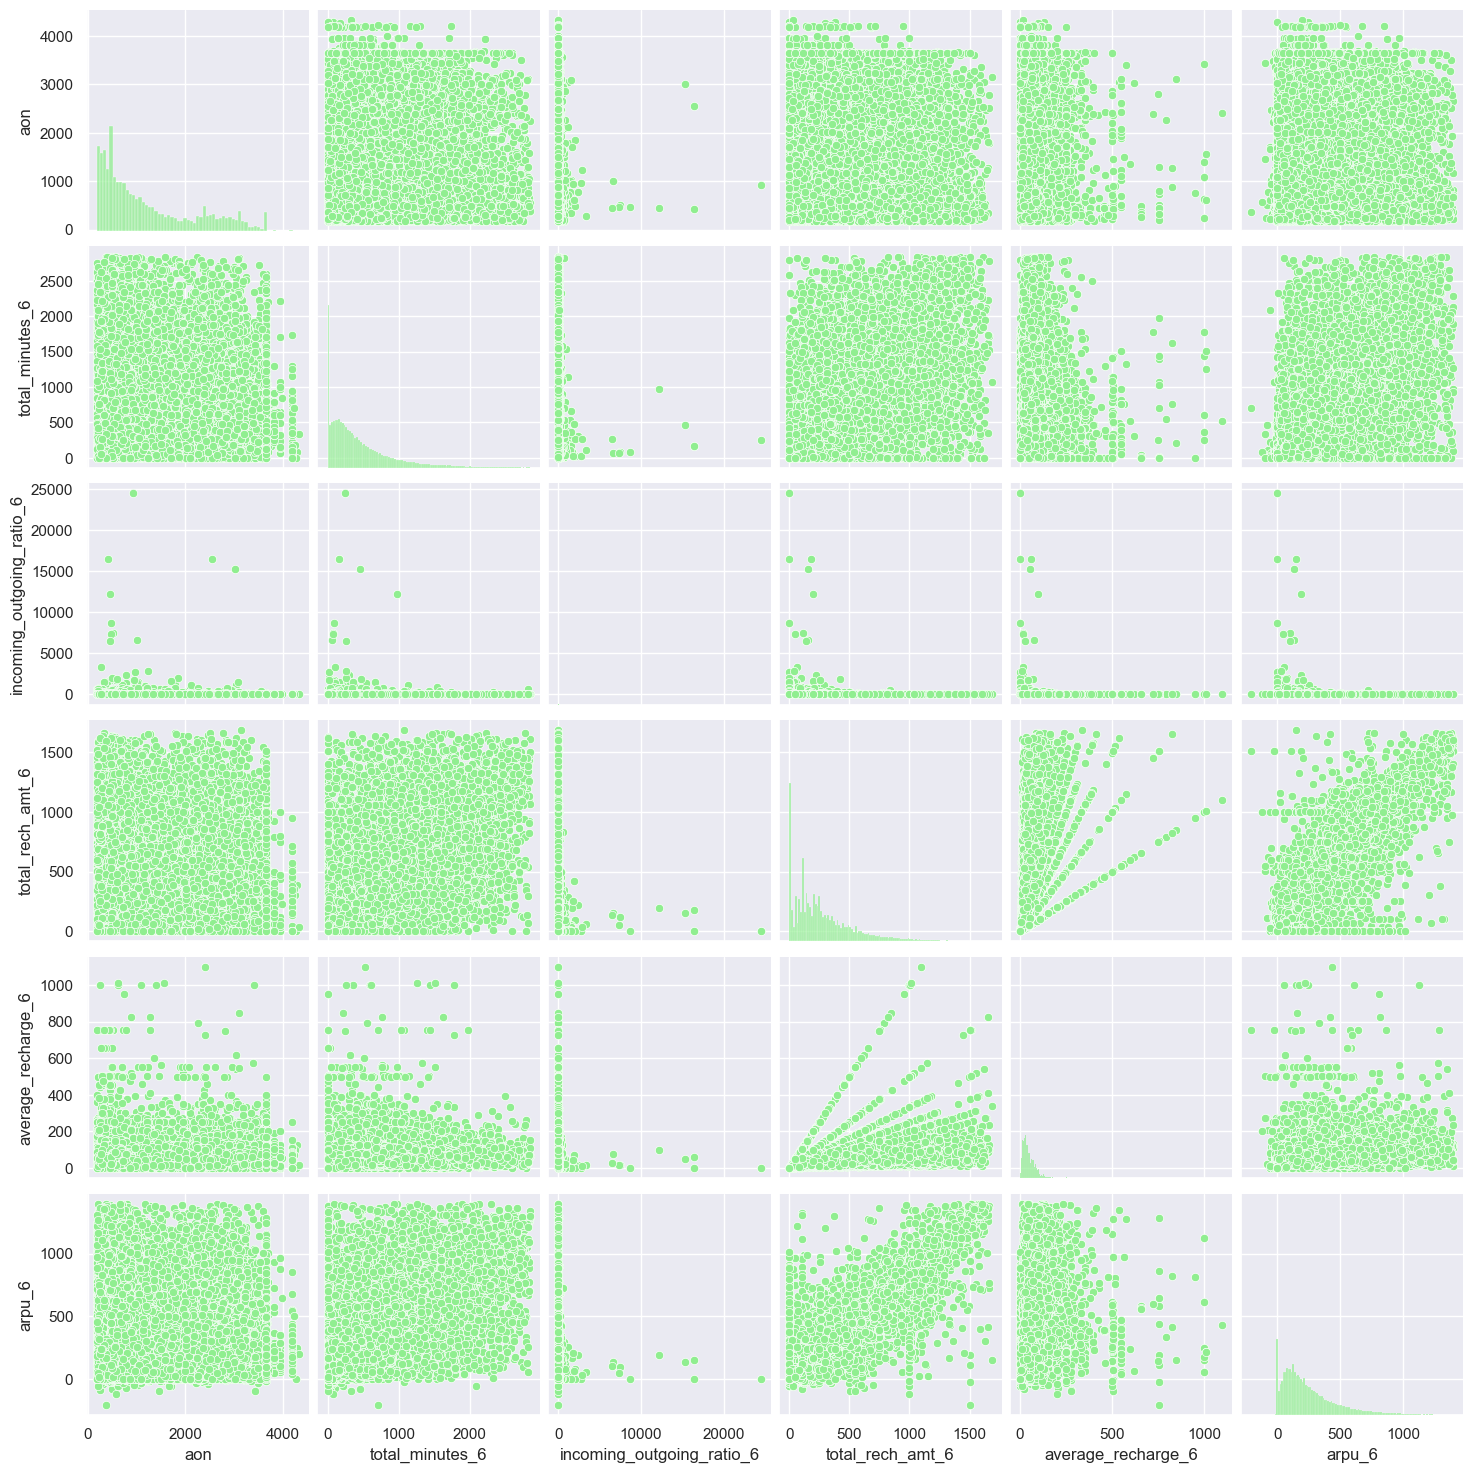

In [91]:
metrics_month_6 = ['aon', 'total_minutes_6', 'incoming_outgoing_ratio_6', 'total_rech_amt_6', 'average_recharge_6', 'arpu_6']
sns.pairplot(telecom_final[metrics_month_6], 
             plot_kws={'color': 'lightgreen'}, 
             diag_kws={'color': 'lightgreen'})
plt.show()

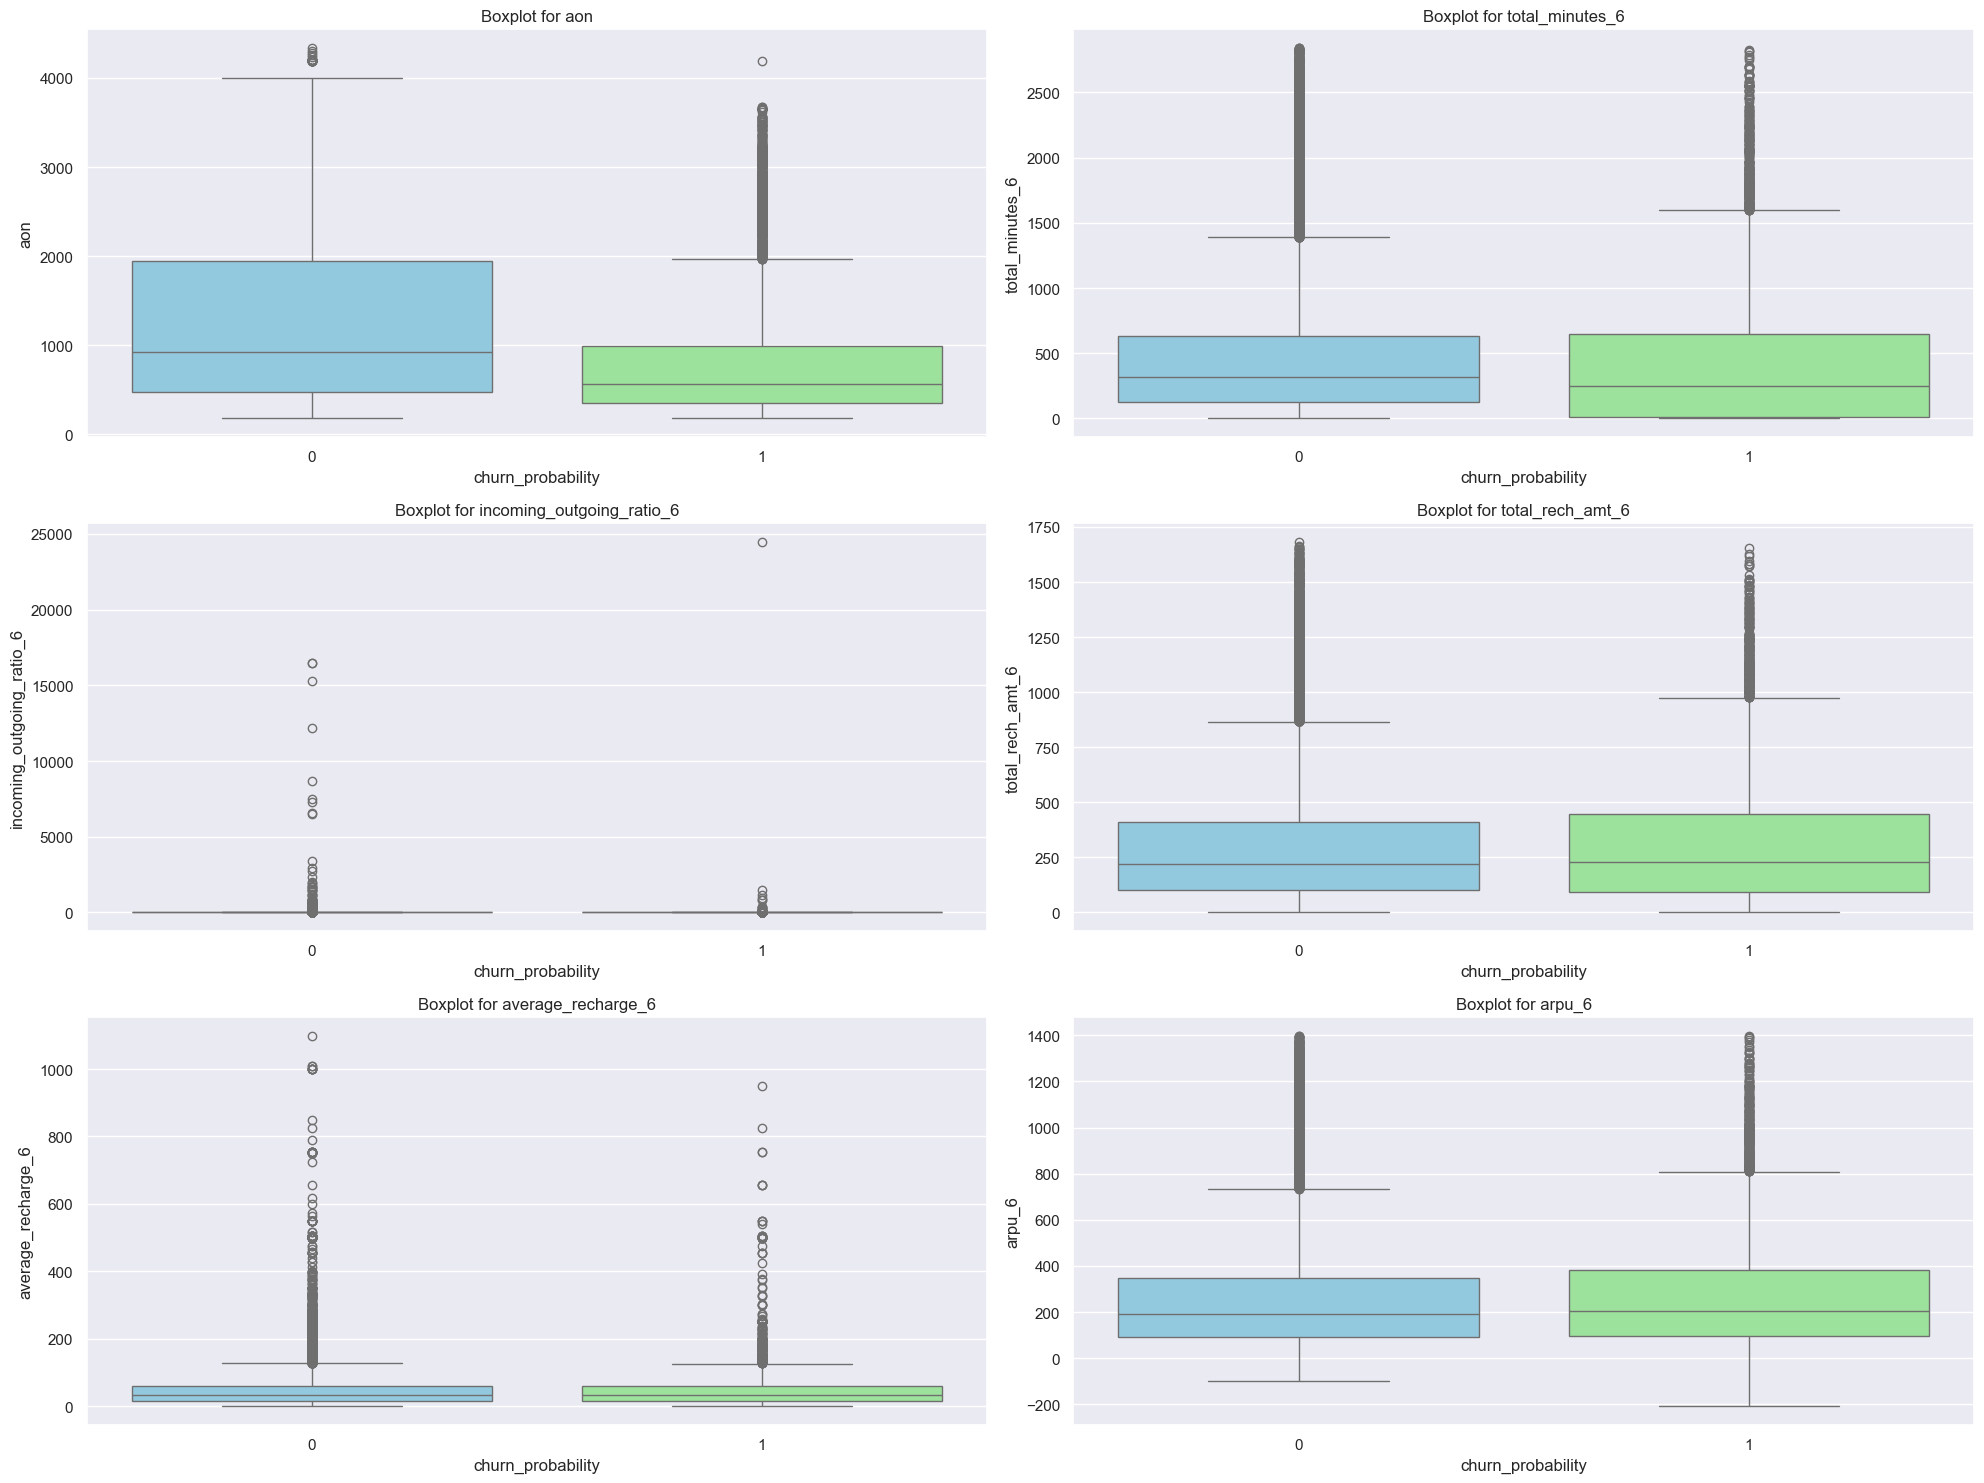

In [89]:
num_plots = len(metrics_month_6)
num_cols = 2
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

colors = ["skyblue", "lightgreen"]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for index, col in enumerate(metrics_month_6):
    sns.boxplot(data=telecom_final, x='churn_probability', y=col, ax=axes[index], palette=colors)
    axes[index].set_title(f"Boxplot for {col}")

if num_plots % num_cols > 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

#### Variables for Month 7

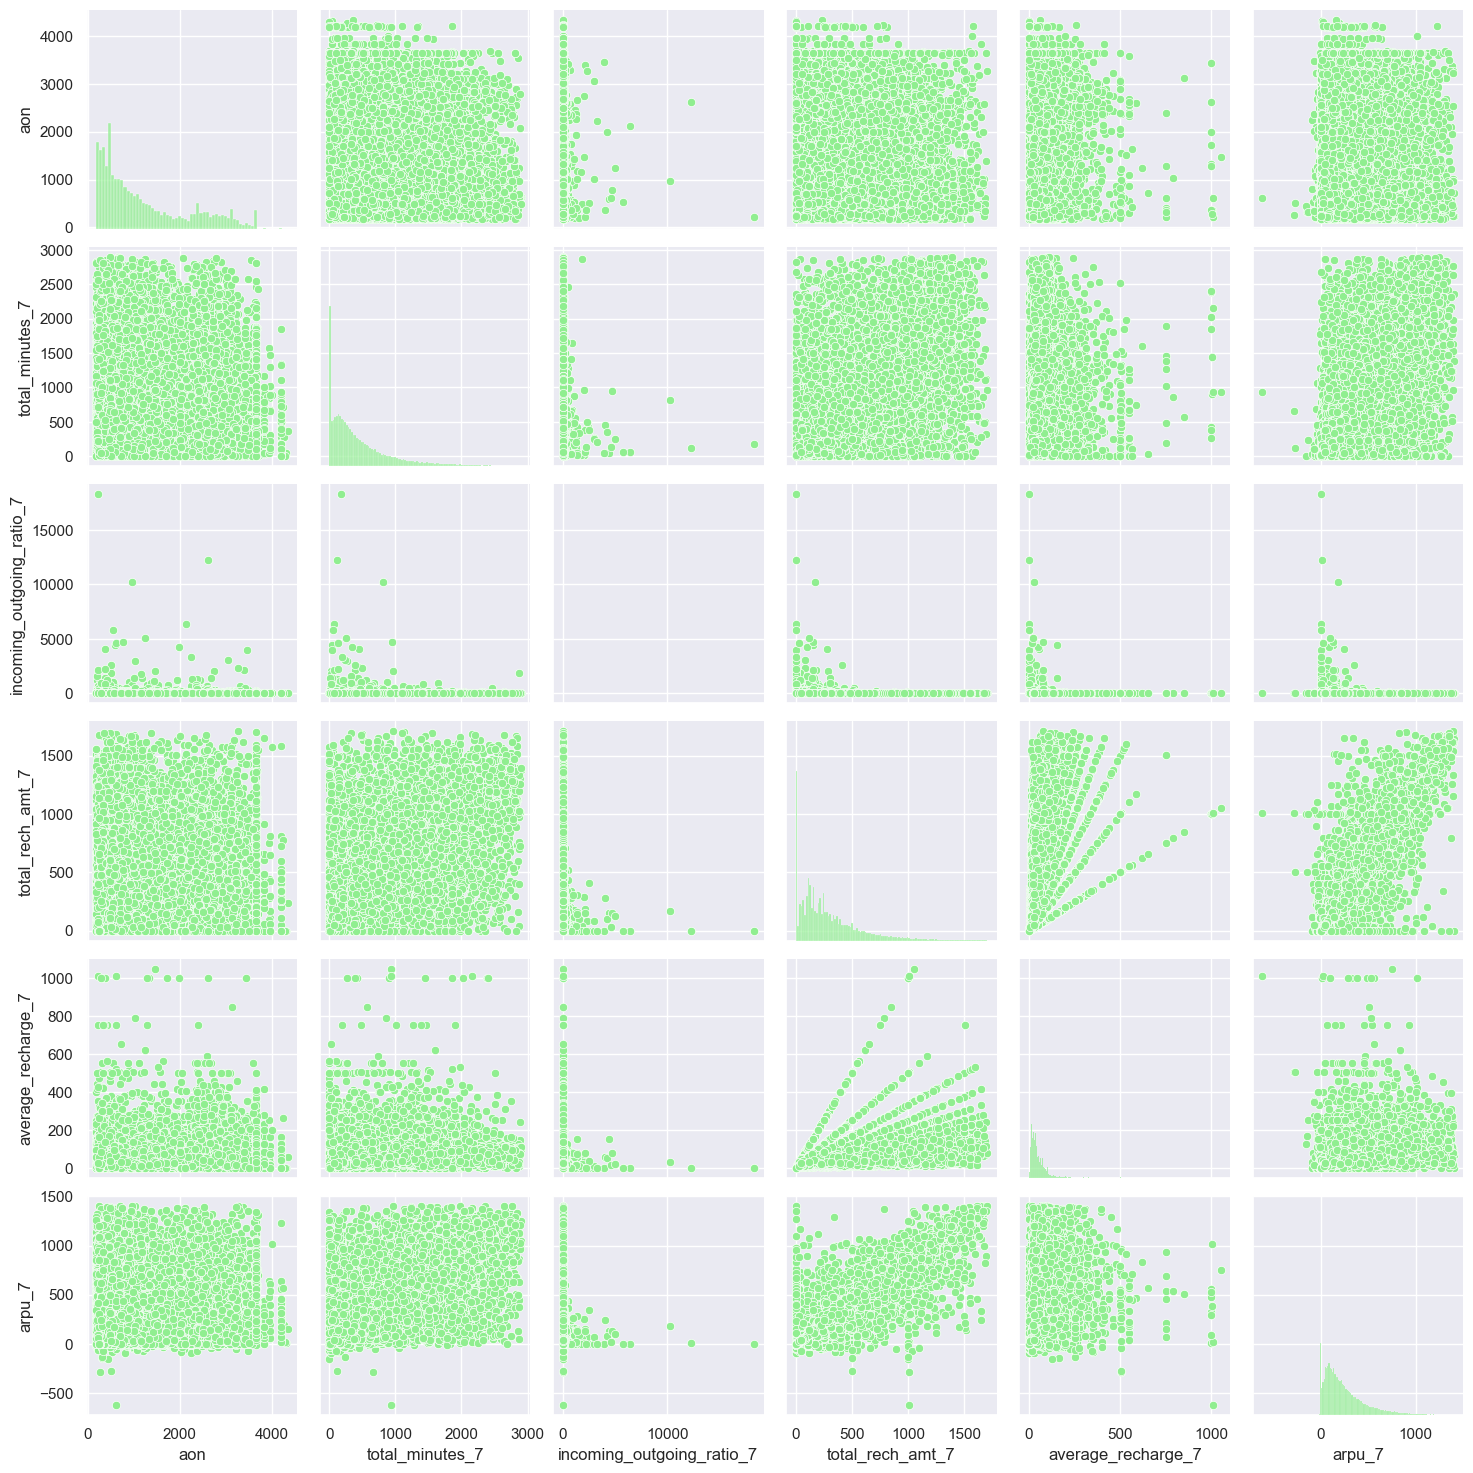

In [92]:
metrics_month_7 = ['aon', 'total_minutes_7', 'incoming_outgoing_ratio_7', 'total_rech_amt_7', 'average_recharge_7', 'arpu_7']
sns.pairplot(telecom_final[metrics_month_7], 
             plot_kws={'color': 'lightgreen'}, 
             diag_kws={'color': 'lightgreen'})
plt.show()

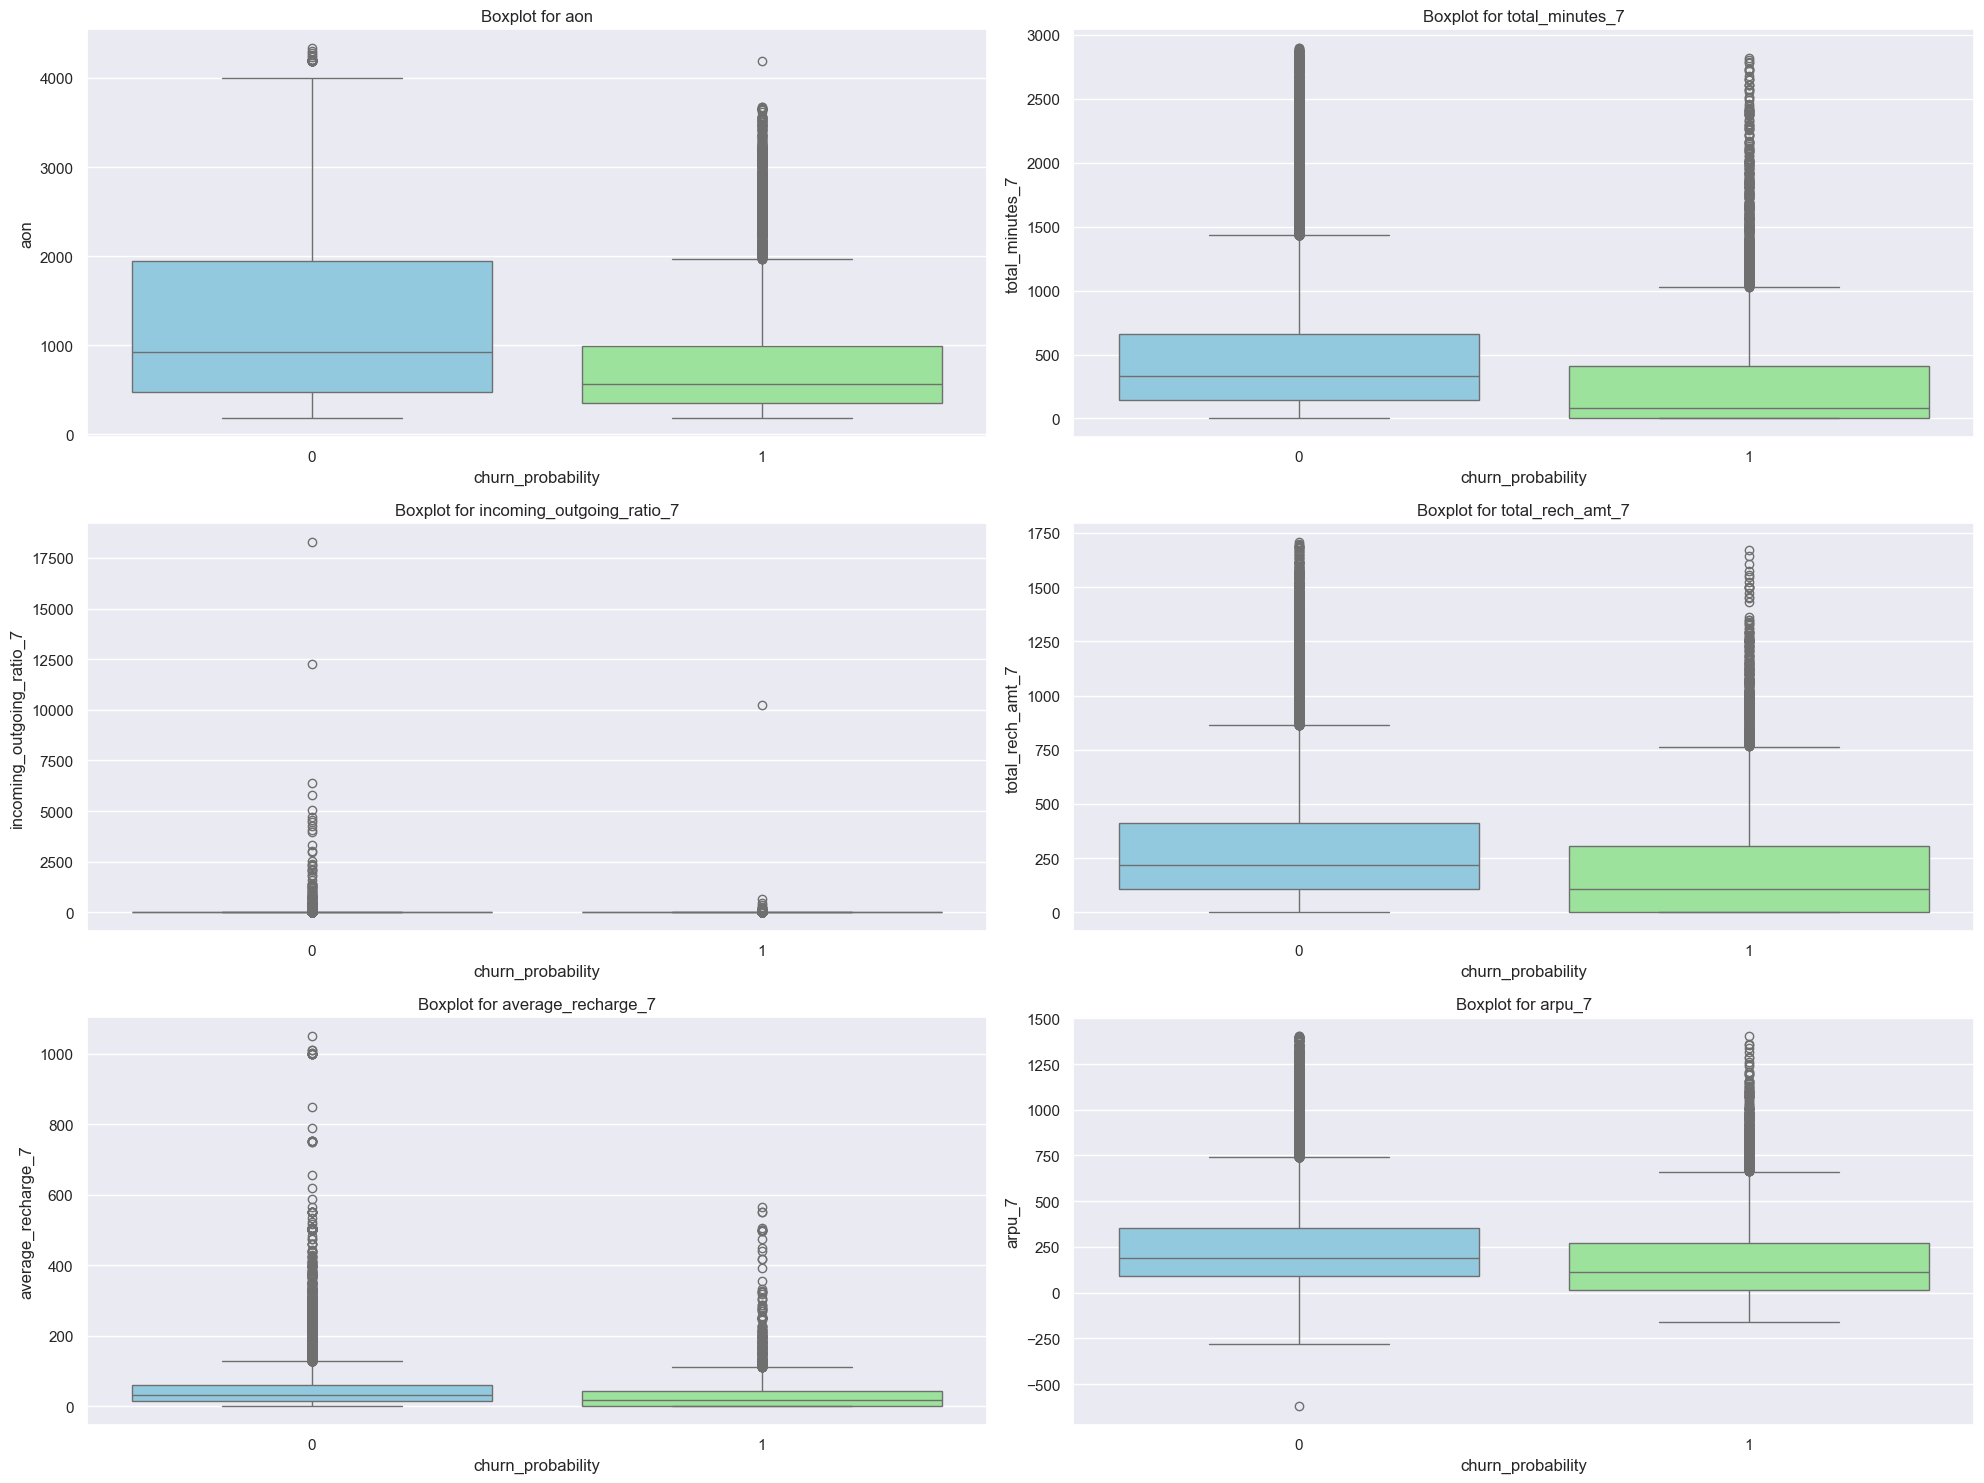

In [93]:
num_plots = len(metrics_month_7)
num_cols = 2
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

colors = ["skyblue", "lightgreen"]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for index, col in enumerate(metrics_month_7):
    sns.boxplot(data=telecom_final, x='churn_probability', y=col, ax=axes[index], palette=colors)
    axes[index].set_title(f"Boxplot for {col}")

if num_plots % num_cols > 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

#### Variables for Month 8

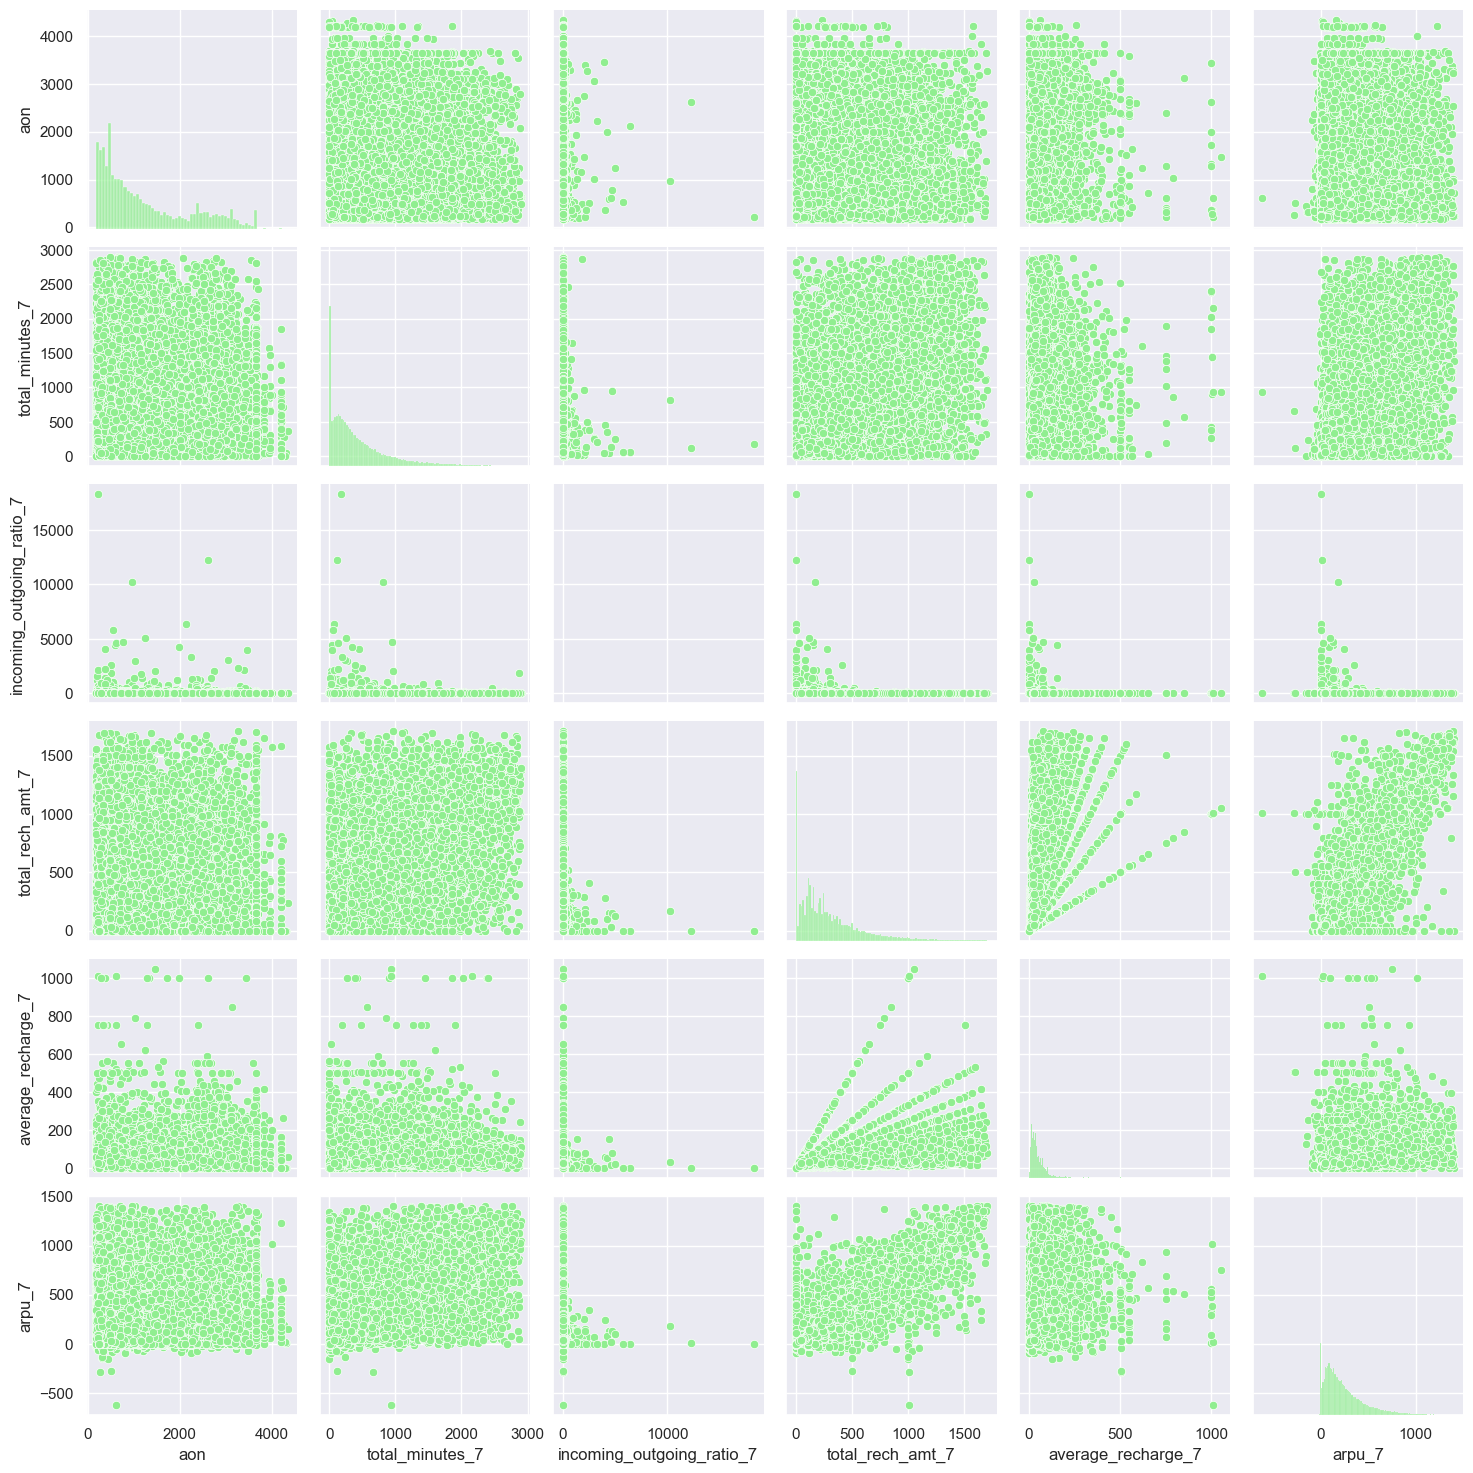

In [94]:
metrics_month_8 = ['aon', 'total_minutes_8', 'incoming_outgoing_ratio_8', 'total_rech_amt_8', 'average_recharge_8', 'arpu_8']
sns.pairplot(telecom_final[metrics_month_7], 
             plot_kws={'color': 'lightgreen'}, 
             diag_kws={'color': 'lightgreen'})
plt.show()

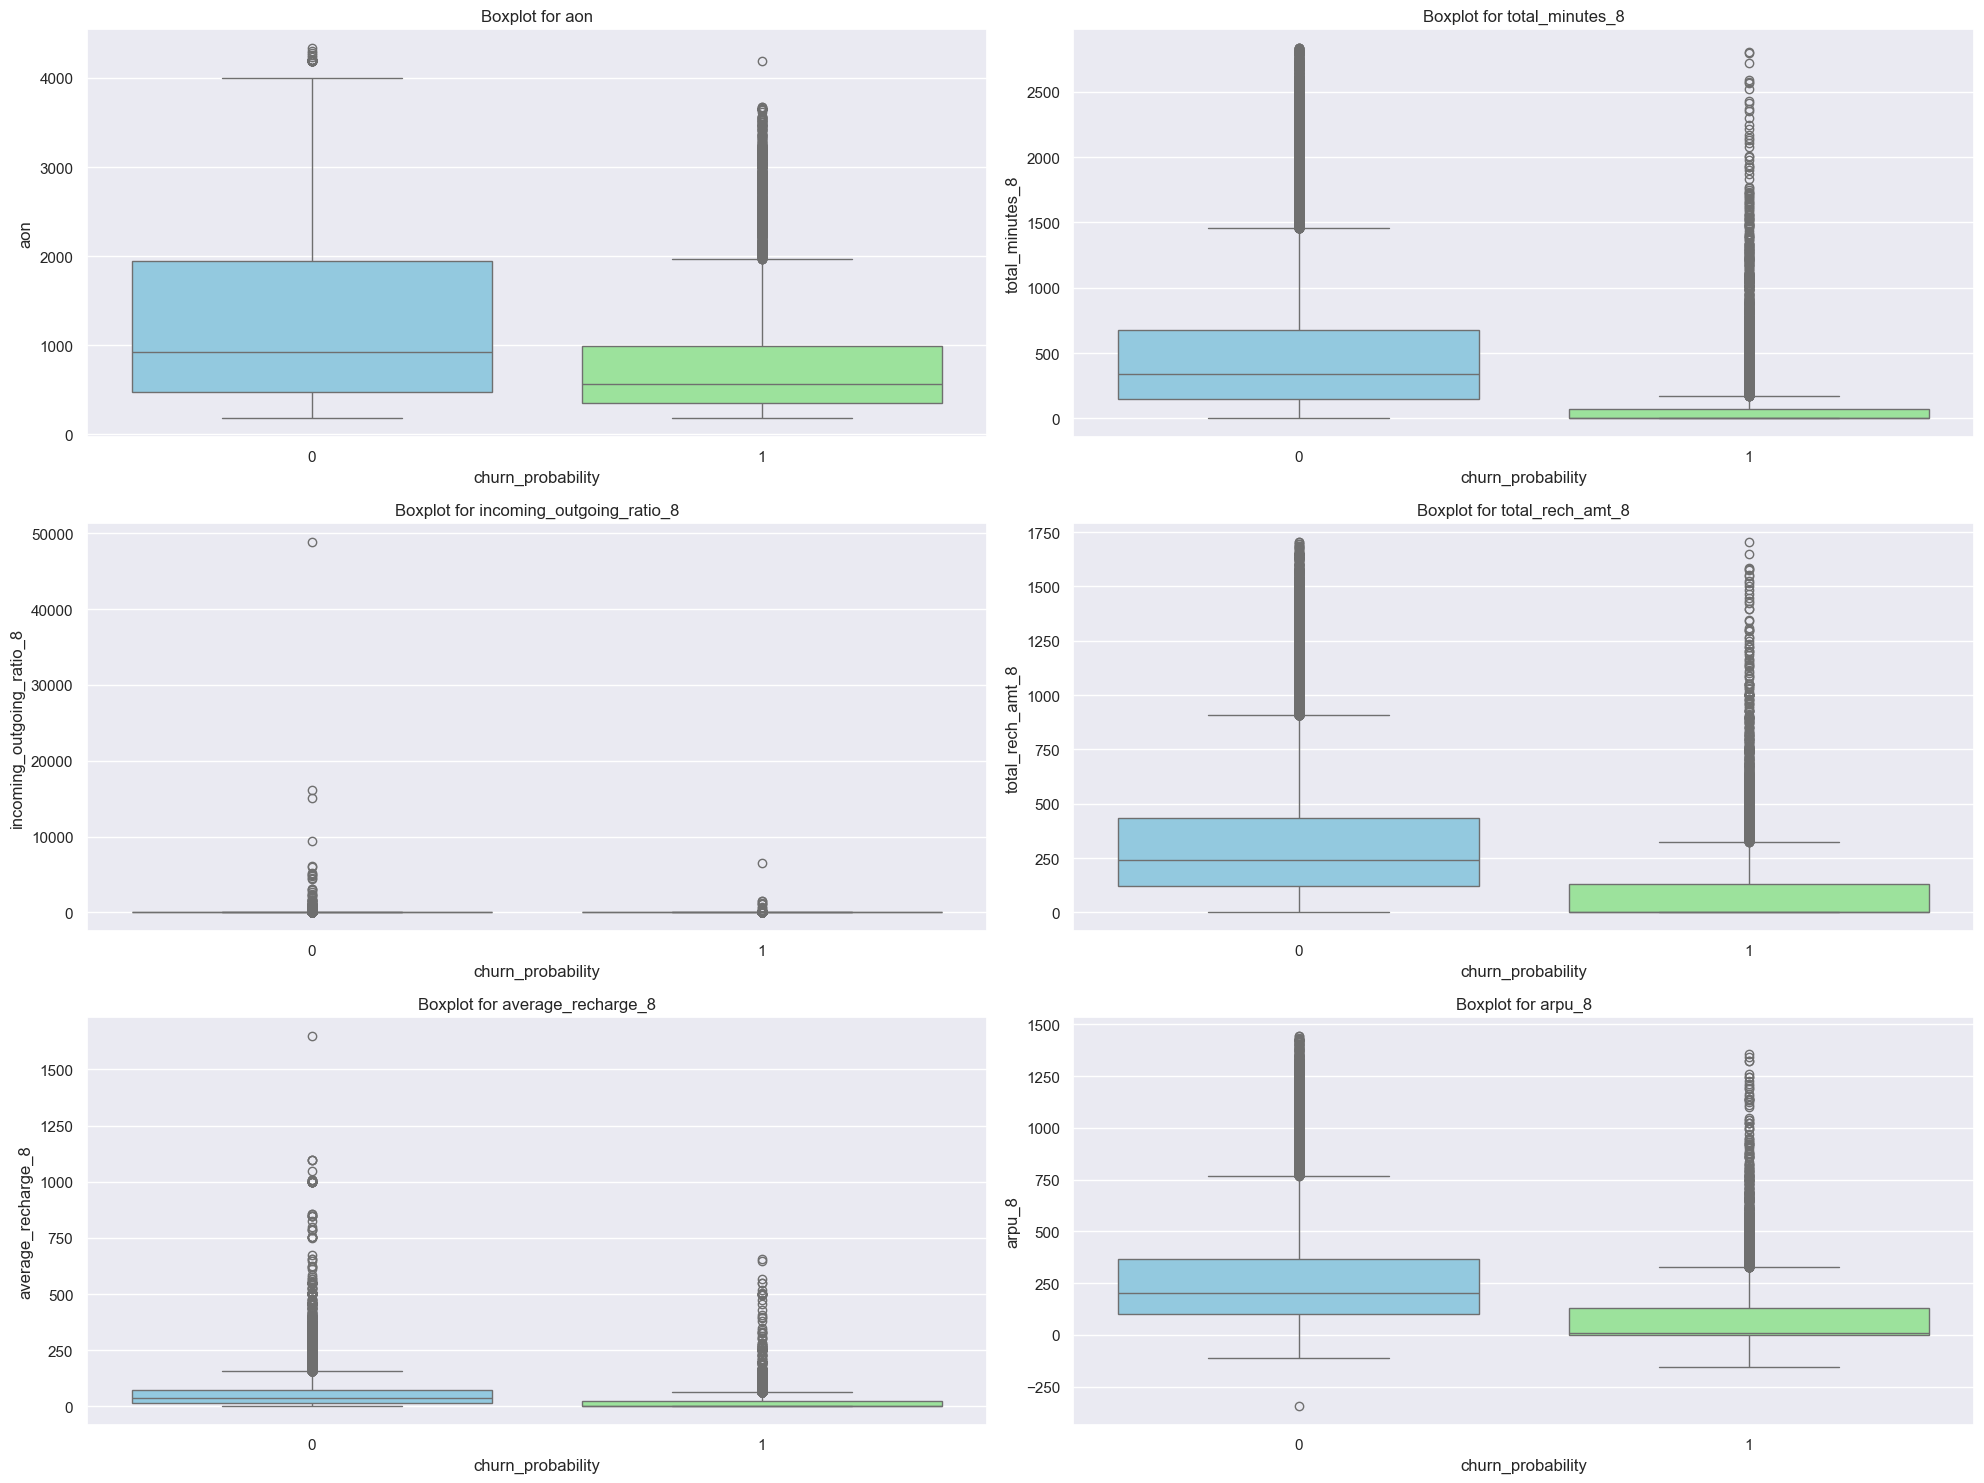

In [95]:
num_plots = len(metrics_month_8)
num_cols = 2
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

colors = ["skyblue", "lightgreen"]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for index, col in enumerate(metrics_month_8):
    sns.boxplot(data=telecom_final, x='churn_probability', y=col, ax=axes[index], palette=colors)
    axes[index].set_title(f"Boxplot for {col}")

if num_plots % num_cols > 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

#### Observations from the Analysis:

 - A higher number of customers are relatively new, with the number decreasing as customer tenure increases.
 - There is a correlation observed between certain variables, like arpu and total recharge amount.
 - The variables generally do not display a linear relationship with one another.
 - The analysis suggests that newer customers tend to churn more than long-standing ones, as indicated by the account age (aon) variable.
 - Other predictive variables do not demonstrate a distinct correlation with the likelihood of churn.

#### Observations on Multicollinearity:

There is evident multicollinearity among the variables, likely due to their interrelated nature. 

At this stage, we won't address these issues directly. Instead, we'll rely on the modeling algorithms to manage the multicollinearity as part of their processing.

## Step 2 - Preparation of Data for Modeling

1. The dataset includes categorical variables already encoded in binary format, so they require no further transformation.
2. The remaining numerical variables will necessitate scaling post the train-test split.

In [35]:
telecom_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 67668 entries, 0 to 69998
Data columns (total 141 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    arpu_6                           float64
 1    arpu_7                           float64
 2    arpu_8                           float64
 3    onnet_mou_6                      float64
 4    onnet_mou_7                      float64
 5    onnet_mou_8                      float64
 6    offnet_mou_6                     float64
 7    offnet_mou_7                     float64
 8    offnet_mou_8                     float64
 9    roam_ic_mou_6                    float64
 10   roam_ic_mou_7                    float64
 11   roam_ic_mou_8                    float64
 12   roam_og_mou_6                    float64
 13   roam_og_mou_7                    float64
 14   roam_og_mou_8                    float64
 15   loc_og_t2t_mou_6                 float64
 16   loc_og_t2t_mou_7                 float64
 1

In [36]:
# Splitting the dataset into training and testing sets using the updated dataset name
df_train, df_test = train_test_split(telecom_final, train_size=0.75, test_size=0.25, random_state=100)

In [37]:
# Splitting the dataset into predictors and target variable for training set
y_train = df_train.pop('churn_probability')
X_train = df_train

# Splitting the dataset into predictors and target variable for testing set
y_test = df_test.pop('churn_probability')
X_test = df_test


In [38]:
# Displaying the top entries in the training feature set to verify scaling and preparation
X_train.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
51405   95.322   98.330  131.323        22.76         5.79        18.39   
33183  352.053  237.342    3.500       178.49       106.69         0.00   
10782  479.004  228.174  384.839         7.98        25.94        16.83   
40709   75.758   79.227  157.130        26.64        37.48        98.84   
38081  221.961  293.984  324.505         3.09         6.26         8.03   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
51405         29.53         64.81        109.08           0.00           0.00   
33183        407.58        182.94         10.70           0.00          37.01   
10782        118.18        101.94        170.84           0.00           0.00   
40709         43.33         34.19         55.34           0.00           0.00   
38081        106.79        116.66        125.16           5.43           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
51405           0.00           0.00           0.00           0.00   
33183          10.86           0.00          53.88          14.23   
10782           0.00           0.00           0.00           0.00   
40709           0.00           0.00           0.00           0.00   
38081           0.00           0.48           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
51405             22.76              5.79             18.39             28.74   
33183             27.38             38.51              0.00             14.38   
10782              7.98             25.94             16.83             71.96   
40709             26.64             30.81             75.06             40.34   
38081              3.09              6.26              8.03            106.31   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
51405             63.56            109.04              0.78              0.00   
33183             31.56              0.00              0.00              0.00   
10782             62.76            104.69             46.21             38.14   
40709             33.66             41.34              0.85              0.00   
38081            115.49            118.63              0.00              1.16   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
51405              0.00              0.00              1.25               0.0   
33183              0.00              6.69              0.00               1.9   
10782             66.14              0.00              0.00               0.0   
40709              0.00              0.00              0.00               0.0   
38081              3.88              0.00              0.00               0.0   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
51405         52.29         69.36        127.44              0.00   
33183         41.76         70.08          0.00            151.11   
10782        126.16        126.86        187.68              0.00   
40709         67.84         64.48        116.41              0.00   
38081        109.41        122.93        130.54              0.00   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
51405              0.00              0.00              0.00              0.00   
33183             51.74              0.00            368.53            114.78   
10782              0.00              0.00              0.00              1.03   
40709              6.66             23.78              2.13              0.53   
38081              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
51405              0.00               0.0               0.0               0.0   
33183              0.00               2.9               0.0               0.0   
10782              0.00               0.0        

In [39]:
# Displaying the initial entries of the target variable in the training set
y_train.head()

51405    0
33183    1
10782    0
40709    0
38081    0
Name: churn_probability, dtype: int64

In [40]:
# Displaying the shape of the original dataset
print(f"Original dataset shape: {telecom_final.shape}")

# Showing the dimensions of the training features dataset
print(f"Training features dataset shape: {X_train.shape}")

# Indicating the size of the testing features dataset
print(f"Testing features dataset shape: {X_test.shape}")

# Revealing the size of the training target dataset
print(f"Training target dataset shape: {y_train.shape}")

# Providing the dimensions of the testing target dataset
print(f"Testing target dataset shape: {y_test.shape}")


Original dataset shape: (67668, 141)
Training features dataset shape: (50751, 140)
Testing features dataset shape: (16917, 140)
Training target dataset shape: (50751,)
Testing target dataset shape: (16917,)


In [41]:
# Defining a scaling function
def scale_features(train_data, test_data, feature_list):
    scaler = StandardScaler()
    train_data[feature_list] = scaler.fit_transform(train_data[feature_list])
    test_data[feature_list] = scaler.transform(test_data[feature_list])
    return train_data, test_data

# Get the list of columns to be scaled
columns_to_scale = X_train.columns

# Appling the scaling function to the train and test sets
X_train, X_test = scale_features(X_train, X_test, columns_to_scale)

# Display the first few entries of the scaled training set
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
51405 -0.697036 -0.662456 -0.510633    -0.397152    -0.463840    -0.406927   
33183  0.432870 -0.042034 -1.067907     0.295575    -0.019788    -0.488565   
10782  0.991597 -0.082952  0.594628    -0.462897    -0.375162    -0.413852   
40709 -0.783140 -0.747714 -0.398122    -0.379893    -0.324375    -0.049786   
38081 -0.139682  0.210763  0.331588    -0.484649    -0.461772    -0.452918   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
51405     -0.598352     -0.439998     -0.251084      -0.163569      -0.113756   
33183      0.976667      0.052743     -0.659917      -0.163569       0.605283   
10782     -0.229021     -0.285122      0.005569      -0.163569      -0.113756   
40709     -0.540859     -0.567719     -0.474409      -0.163569      -0.113756   
38081     -0.276474     -0.223723     -0.184261      -0.053975      -0.113756   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
51405      -0.118683      -0.214726      -0.183569      -0.172997   
33183       0.106204      -0.214726       1.114019       0.161459   
10782      -0.118683      -0.214726      -0.183569      -0.172997   
40709      -0.118683      -0.214726      -0.183569      -0.172997   
38081      -0.118683      -0.205458      -0.183569      -0.172997   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
51405         -0.164210         -0.325221         -0.202291         -0.418730   
33183         -0.118234         -0.000192         -0.391501         -0.527569   
10782         -0.311295         -0.125058         -0.218342         -0.091150   
40709         -0.125598         -0.076681          0.380770         -0.330809   
38081         -0.359958         -0.320552         -0.308882          0.169201   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
51405         -0.144699          0.219119         -0.223307         -0.294042   
33183         -0.397744         -0.651136         -0.292845         -0.294042   
10782         -0.151025          0.184401          3.826852          3.095185   
40709         -0.381138         -0.321199         -0.217066         -0.294042   
38081          0.265945          0.295657         -0.292845         -0.190961   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
51405         -0.287674         -0.198814         -0.001691         -0.207103   
33183         -0.287674          1.068446         -0.172830          0.092478   
10782          5.693486         -0.198814         -0.172830         -0.207103   
40709         -0.287674         -0.198814         -0.172830         -0.207103   
38081          0.063201         -0.198814         -0.172830         -0.207103   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
51405     -0.390405     -0.293765      0.021821         -0.337792   
33183     -0.445410     -0.289906     -0.673374          0.418651   
10782     -0.004538      0.014434      0.350435         -0.337792   
40709     -0.309178     -0.319922     -0.038348         -0.337792   
38081     -0.092033     -0.006631      0.038732         -0.337792   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
51405         -0.338552         -0.335603         -0.373484         -0.376472   
33183         -0.083761         -0.335603          1.518632          0.204855   
10782         -0.338552         -0.335603         -0.373484         -0.371255   
40709         -0.305755         -0.218172         -0.362548         -0.373788   
38081         -0.338552         -0.335603         -0.373484         -0.376472   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
51405         -0.368905         -0.145794         -0.127973         -0.132748   
33183         -0.368905          0.284342         -0.127973         -0.132748   
10782         -0.368905         

In [42]:
# Displaying the top entries in the testing feature set to verify preparation
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
6173  -1.076950  0.124224  0.312793    -0.498394    -0.483468    -0.452474   
6899  -0.206812 -0.388012 -0.174572    -0.475352    -0.437567    -0.406838   
39350 -0.498440 -0.728911 -0.852236    -0.498394    -0.489322    -0.488565   
28171  0.795685 -0.202259 -0.825288    -0.422596    -0.254797    -0.438889   
67825 -0.542491 -1.091130 -1.083166    -0.498394    -0.347260    -0.346064   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
6173      -0.694257      0.347645      0.037734      -0.163569      -0.113756   
6899      -0.377962     -0.631121     -0.362455      -0.163569      -0.113756   
39350     -0.684508     -0.710332     -0.704382      -0.100396      -0.113756   
28171      3.961226      0.494428     -0.561054      -0.163569      -0.089276   
67825     -0.721379     -0.327064     -0.322894      -0.163569      -0.113756   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
6173       -0.118683      -0.214726      -0.183569      -0.172997   
6899       -0.118683      -0.214726      -0.183569      -0.172997   
39350      -0.118683      -0.214726      -0.183569      -0.172997   
28171      -0.098804      -0.214726       1.012870       0.900882   
67825      -0.118683      -0.214726      -0.183569      -0.172997   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
6173          -0.390709         -0.369525         -0.307853         -0.587219   
6899          -0.339160         -0.265917         -0.202085         -0.011794   
39350         -0.390709         -0.382736         -0.391501         -0.636560   
28171         -0.326720         -0.355617         -0.391501         -0.581534   
67825         -0.390709         -0.267705         -0.270711         -0.636560   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
6173           1.121869          0.642833         -0.292845          2.295420   
6899          -0.497143         -0.006825         -0.292845         -0.294042   
39350         -0.647310         -0.651136         -0.292845         -0.294042   
28171         -0.641142         -0.651136         -0.241137         -0.294042   
67825         -0.329659         -0.329100         -0.292845         -0.294042   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
6173           1.167374         -0.198814          -0.17283         -0.207103   
6899          -0.287674         -0.198814          -0.17283         -0.207103   
39350         -0.287674         -0.198814          -0.17283         -0.207103   
28171         -0.287674          0.502062          -0.17283          1.133126   
67825         -0.287674         -0.198814          -0.17283         -0.207103   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
6173      -0.629542      0.697026      0.343234         -0.337792   
6899      -0.205908     -0.500660     -0.132558         -0.337792   
39350     -0.663547     -0.665533     -0.673374         -0.337792   
28171     -0.588954     -0.646719     -0.673374         -0.284679   
67825     -0.663547     -0.325550     -0.326867         -0.337792   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
6173          -0.338552         -0.335603         -0.373484         -0.376421   
6899          -0.338552         -0.335603         -0.373484         -0.376472   
39350         -0.338552         -0.335603         -0.373484         -0.376472   
28171         -0.132414         -0.335603          5.331615          0.874813   
67825         -0.338552         -0.335603         -0.373484         -0.357682   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
6173          -0.368905         -0.145794         -0.127973         -0.132748   
6899          -0.361117         -0.145794         -0.127973         -0.132748   
39350         -0.368905         

## Step 3 - Development and Assessment of Models

### Establishing a Baseline: Starting with Logistic Regression as the benchmark model, we'll set a reference point before investigating more complex models.

In [43]:
# Preparing the training data for logistic regression by adding a constant to serve as the intercept
X_train_sm = sm.add_constant(X_train)

# Building the logistic regression model using GLM (Generalized Linear Model) with a binomial family
log_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

# Displaying the summary of the logistic regression model to review model performance and statistics
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                50751
Model:                            GLM   Df Residuals:                    50617
Model Family:                Binomial   Df Model:                          133
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9240.9
Date:                Wed, 10 Apr 2024   Deviance:                       18482.
Time:                        21:50:24   Pearson chi2:                 8.18e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2554
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.8549      0.047    -82.040      0.000      -3.947      -3.763
arpu_6                              0.1619      0.076      2.134      0.033       0.013       0.311
arpu_7                              0.3344      0.083      4.038      0.000       0.172       0.497
arpu_8                              0.2785      0.047      5.925      0.000       0.186       0.371
onnet_mou_6                         0.0023      1.493      0.002      0.999      -2.925       2.929
onnet_mou_7                        -0.6858      0.858     -0.799      0.424      -2.368       0.996
onnet_mou_8                        -0.6386      1.054     -0.606      0.545      -2.704       1.427
offnet_mou_6                        0.7262      1.580      0.459      0.646      -2.371       3.824
offnet_mou_7                       -0.8133      0.864     -0.941      0.347      -2.507       0.881
offnet_mou_8                       -1.0041      1.097     -0.915      0.360      -3.154       1.146
roam_ic_mou_6                       0.0543      0.020      2.677      0.007       0.015       0.094
roam_ic_mou_7                       0.0428      0.023      1.833      0.067      -0.003       0.089
roam_ic_mou_8                      -0.0237      0.020     -1.184      0.236      -0.063       0.016
roam_og_mou_6                      -0.0670      0.342     -0.196      0.844      -0.737       0.603
roam_og_mou_7                       0.1399      0.152      0.919      0.358      -0.158       0.438
roam_og_mou_8                       0.2330      0.195      1.193      0.233      -0.150       0.616
loc_og_t2t_mou_6                  648.9132    393.921      1.647      0.099    -123.159    1420.985
loc_og_t2t_mou_7                 1721.3113    408.861      4.210      0.000     919.959    2522.664
loc_og_t2t_mou_8                 4278.1504    450.522      9.496      0.000    3395.143    5161.158
loc_og_t2m_mou_6                  851.5151    517.214      1.646      0.100    -162.206    1865.236
loc_og_t2m_mou_7                 2162.2434    513.615      4.210      0.000    1155.576    3168.910
loc_og_t2m_mou_8                 5515.3523    580.788      9.496      0.000    4377.028    6653.677
loc_og_t2f_mou_6                   72.3712     43.976      1.646      0.100     -13.821     158.563
loc_og_t2f_mou_7                  192.4954     45.710      4.211      0.000     102.905     282.085
loc_og_t2f_mou_8                  486.7942     51.262      9.496      0.000     386.323     587.266
loc_og_t2c_mou_6                   -0.0396      0.028     -1.440      0.150      -0.094       0.014
loc_og_t2c_mou_7                    0.0099      0.025      0.390      0.697      -0.040       0.060
loc_og_t2c_mou_8                    0.0686      0.034      2.042      0.041       0

Creating a function for model evaluation. This will allow us to consistently assess the performance of various models throughout the analysis.

In [45]:
def evaluate_classification_model(true_labels, predicted_labels):
    # Generateing the confusion matrix from true and predicted labels
    confusion_mat = confusion_matrix(true_labels, predicted_labels)
    print('Confusion Matrix:\n', confusion_mat)
    
    # Extracting true positives, true negatives, false positives, and false negatives
    true_pos = confusion_mat[1, 1]  
    true_neg = confusion_mat[0, 0]  
    false_pos = confusion_mat[0, 1]  
    false_neg = confusion_mat[1, 0]  

    # Calculating the metrics
    accuracy = (true_neg + true_pos) / np.sum(confusion_mat)
    recall = true_pos / (false_neg + true_pos)
    specificity = true_neg / (true_neg + false_pos)
    false_positive_rate = false_pos / (true_neg + false_pos)
    precision = true_pos / (false_pos + true_pos)
    negative_predictive_value = true_neg / (true_neg + false_neg)

    # Printing the metrics
    print(f"Accuracy = {accuracy:.2f}")
    print(f"Sensitivity/Recall = {recall:.2f}")
    print(f"Specificity = {specificity:.2f}")
    print(f"False Positive Rate = {false_positive_rate:.2f}")
    print(f"Precision = {precision:.2f}")
    print(f"Negative Predictive Value = {negative_predictive_value:.2f}")

In [46]:
y_train_pred = log_model.predict(X_train_sm)

Constructing a DataFrame to hold the predicted churn flags, with a threshold of 0.5 to determine the classifications. Following this, the model's performance will be assessed.

In [47]:
# Creating a DataFrame from the predicted probabilities
predicted_churn_df = pd.DataFrame(y_train_pred, columns=['Churn_Probability'])

# Applying a 0.5 cutoff to determine the predicted class
predicted_churn_df['Predicted_Churn'] = predicted_churn_df['Churn_Probability'].apply(lambda prob: 1 if prob > 0.5 else 0)

# Displaying the DataFrame with probabilities and predicted classes
predicted_churn_df

Churn_Probability  Predicted_Churn
51405           0.003637                0
33183           0.477225                0
10782           0.001478                0
40709           0.001280                0
38081           0.000041                0
...                  ...              ...
14715           0.016954                0
65549           0.223423                0
67872           0.073241                0
58031           0.007092                0
39728           0.650393                1

[50751 rows x 2 columns]

In [48]:
# Evaluating the model using key metrics from the confusion matrix
evaluate_classification_model(y_train, predicted_churn_df['Predicted_Churn'])

Confusion Matrix:
 [[44871   701]
 [ 2709  2470]]
Accuracy = 0.93
Sensitivity/Recall = 0.48
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.78
Negative Predictive Value = 0.94


The foundational model is showing strong performance with respect to accuracy, specificity, and precision. 

The next step involves enhancing the sensitivity/recall. Given the extensive set of features, employing Recursive Feature Elimination (RFE) will help in narrowing down to a smaller subset of significant features. Subsequent refinement will be conducted by examining p-values and Variance Inflation Factor (VIF) for optimal feature selection.

#### Selecting Features with Recursive Feature Elimination

After numerous iterations of experimentation, we applied Recursive Feature Elimination (RFE) using a range from 10 to 20 features. Below is an example showcasing the selection of 10 features.

In [49]:
# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Configure RFE with the logistic regression model to select 10 features
feature_selector = RFE(estimator=logistic_regression_model, n_features_to_select=10)

# Fit RFE
feature_selector = feature_selector.fit(X_train, y_train)

# Identifying columns selected by the RFE process
selected_columns = X_train.columns[feature_selector.support_]
selected_columns


Index(['onnet_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_minutes_8', 'august_ic_mou_change'],
      dtype='object')

In [50]:
# Building and summarizing an updated logistic regression model with RFE-selected features

X_train_selected = sm.add_constant(X_train[selected_columns])
updated_log_model = sm.GLM(y_train, X_train_selected, family=sm.families.Binomial()).fit()
updated_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                50751
Model:                            GLM   Df Residuals:                    50741
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11100.
Date:                Wed, 10 Apr 2024   Deviance:                       22200.
Time:                        21:53:05   Pearson chi2:                 2.99e+09
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1988
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.6773      0.048    -76.515      0.000      -3.772      -3.583
onnet_mou_8              0.2261      0.045      5.029      0.000       0.138       0.314
loc_ic_t2t_mou_8         1.5189      0.308      4.934      0.000       0.916       2.122
loc_ic_t2m_mou_8         1.2875      0.459      2.805      0.005       0.388       2.187
loc_ic_mou_8             3.9935      0.527      7.575      0.000       2.960       5.027
std_ic_t2t_mou_8         1.7868      0.047     38.014      0.000       1.695       1.879
std_ic_t2m_mou_8         2.4117      0.068     35.437      0.000       2.278       2.545
total_ic_mou_8          -4.8882      0.097    -50.164      0.000      -5.079      -4.697
isd_ic_mou_8             2.3090      0.047     48.641      0.000       2.216       2.402
total_minutes_8         -0.7594      0.072    -10.478      0.000      -0.901      -0.617
august_ic_mou_change    -4.8882      0.097    -50.164      0.000      -5.079      -4.697
========================================================================================
"""

In [51]:
# Predicting churn probabilities with the updated model and evaluating its classification performance

y_train_pred_updated = updated_log_model.predict(X_train_selected)
predicted_df_updated = pd.DataFrame(y_train_pred_updated, columns=['Churn_Probability'])
predicted_df_updated['Predicted_Churn'] = predicted_df_updated['Churn_Probability'].apply(lambda prob: 1 if prob > 0.5 else 0)
evaluate_classification_model(y_train, predicted_df_updated['Predicted_Churn'])

Confusion Matrix:
 [[45003   569]
 [ 3016  2163]]
Accuracy = 0.93
Sensitivity/Recall = 0.42
Specificity = 0.99
False Positive Rate = 0.01
Precision = 0.79
Negative Predictive Value = 0.94


The updated model exhibits comparable accuracy and precision to the initial model, though it shows a slight decline in recall.

Calculating Variance Inflation Factor (VIF) to Address Multicollinearity

In [52]:
def calculate_vif(dataframe):
    # Initializing a DataFrame to hold feature names and their VIF scores
    vif_df = pd.DataFrame()
    vif_df['Feature'] = dataframe.columns
    vif_df['VIF Score'] = [variance_inflation_factor(dataframe.values, index) for index in range(dataframe.shape[1])]
    vif_df['VIF Score'] = round(vif_df['VIF Score'], 2)
    vif_df = vif_df.sort_values(by="VIF Score", ascending=False)
    return vif_df

In [53]:
calculate_vif(X_train[selected_columns])

Feature  VIF Score
6        total_ic_mou_8        inf
9  august_ic_mou_change        inf
3          loc_ic_mou_8      81.06
2      loc_ic_t2m_mou_8      17.71
1      loc_ic_t2t_mou_8       8.22
5      std_ic_t2m_mou_8       6.20
7          isd_ic_mou_8       5.00
8       total_minutes_8       4.31
4      std_ic_t2t_mou_8       3.59
0           onnet_mou_8       2.38

In [54]:
# Adjusting the list of selected features by removing the specified column
selected_columns = selected_columns.drop('total_ic_mou_8')

# Adding a constant to the updated set of selected features for the logistic regression model
X_train_selected = sm.add_constant(X_train[selected_columns])

# Constructing and fitting the logistic regression model using the updated features
updated_log_model_3 = sm.GLM(y_train, X_train_selected, family=sm.families.Binomial()).fit()

# Displaying the summary of the new logistic regression model
updated_log_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                50751
Model:                            GLM   Df Residuals:                    50741
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11100.
Date:                Wed, 10 Apr 2024   Deviance:                       22200.
Time:                        21:53:19   Pearson chi2:                 2.99e+09
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1988
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.6774      0.048    -76.977      0.000      -3.771      -3.584
onnet_mou_8              0.2261      0.045      5.038      0.000       0.138       0.314
loc_ic_t2t_mou_8         1.5196      0.304      4.994      0.000       0.923       2.116
loc_ic_t2m_mou_8         1.2885      0.454      2.841      0.005       0.399       2.178
loc_ic_mou_8             3.9923      0.521      7.661      0.000       2.971       5.014
std_ic_t2t_mou_8         1.7868      0.047     37.958      0.000       1.695       1.879
std_ic_t2m_mou_8         2.4118      0.068     35.579      0.000       2.279       2.545
isd_ic_mou_8             2.3085      0.047     49.565      0.000       2.217       2.400
total_minutes_8         -0.7594      0.072    -10.495      0.000      -0.901      -0.618
august_ic_mou_change    -9.7767      0.194    -50.495      0.000     -10.156      -9.397
========================================================================================
"""

In [55]:
# Predicting and evaluating the performance of the updated logistic regression model

y_train_pred_updated_3 = updated_log_model_3.predict(X_train_selected)
predicted_df_updated_3 = pd.DataFrame(y_train_pred_updated_3, columns=['Churn_Probability'])
predicted_df_updated_3['Predicted_Churn'] = predicted_df_updated_3['Churn_Probability'].apply(lambda prob: 1 if prob > 0.5 else 0)
evaluate_classification_model(y_train, predicted_df_updated_3['Predicted_Churn'])

Confusion Matrix:
 [[45003   569]
 [ 3016  2163]]
Accuracy = 0.93
Sensitivity/Recall = 0.42
Specificity = 0.99
False Positive Rate = 0.01
Precision = 0.79
Negative Predictive Value = 0.94


The model's performance is comparable to its earlier iteration, with the added advantage that all coefficients now exhibit significance, as indicated by their p-values. Next, we will examine the Variance Inflation Factor (VIF) to assess multicollinearity.

In [56]:
calculate_vif(X_train[selected_columns])

Feature  VIF Score
3          loc_ic_mou_8      81.06
8  august_ic_mou_change      76.76
2      loc_ic_t2m_mou_8      17.72
1      loc_ic_t2t_mou_8       8.22
5      std_ic_t2m_mou_8       6.20
6          isd_ic_mou_8       5.00
7       total_minutes_8       4.31
4      std_ic_t2t_mou_8       3.59
0           onnet_mou_8       2.38

In [57]:
selected_columns = selected_columns.drop('loc_ic_mou_8')

# Creating and summarizing an updated logistic regression model after feature adjustment
X_train_selected = sm.add_constant(X_train[selected_columns])
updated_log_model_4 = sm.GLM(y_train, X_train_selected, family=sm.families.Binomial()).fit()
updated_log_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                50751
Model:                            GLM   Df Residuals:                    50742
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11123.
Date:                Wed, 10 Apr 2024   Deviance:                       22246.
Time:                        21:55:26   Pearson chi2:                 8.95e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1981
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.8083      0.046    -83.173      0.000      -3.898      -3.719
onnet_mou_8              0.2354      0.045      5.212      0.000       0.147       0.324
loc_ic_t2t_mou_8         3.7504      0.105     35.605      0.000       3.544       3.957
loc_ic_t2m_mou_8         4.7058      0.106     44.453      0.000       4.498       4.913
std_ic_t2t_mou_8         1.9228      0.045     42.396      0.000       1.834       2.012
std_ic_t2m_mou_8         2.6083      0.065     40.265      0.000       2.481       2.735
isd_ic_mou_8             2.4801      0.043     57.384      0.000       2.395       2.565
total_minutes_8         -0.7934      0.073    -10.891      0.000      -0.936      -0.651
august_ic_mou_change   -10.5208      0.180    -58.537      0.000     -10.873     -10.169
========================================================================================
"""

In [58]:
# Generating predictions and evaluating the updated logistic regression model

y_train_pred_updated_4 = updated_log_model_4.predict(X_train_selected)
predicted_df_updated_4 = pd.DataFrame(y_train_pred_updated_4, columns=['Churn_Probability'])
predicted_df_updated_4['Predicted_Churn_Flag'] = predicted_df_updated_4['Churn_Probability'].apply(lambda prob: 1 if prob > 0.5 else 0)
evaluate_classification_model(y_train, predicted_df_updated_4['Predicted_Churn_Flag'])

Confusion Matrix:
 [[45003   569]
 [ 3016  2163]]
Accuracy = 0.93
Sensitivity/Recall = 0.42
Specificity = 0.99
False Positive Rate = 0.01
Precision = 0.79
Negative Predictive Value = 0.94


In [59]:
calculate_vif(X_train[selected_columns])

Feature  VIF Score
7  august_ic_mou_change      28.99
2      loc_ic_t2m_mou_8      12.11
1      loc_ic_t2t_mou_8       5.85
6       total_minutes_8       4.26
4      std_ic_t2m_mou_8       2.97
5          isd_ic_mou_8       2.49
0           onnet_mou_8       2.38
3      std_ic_t2t_mou_8       1.98

In [62]:
selected_columns = selected_columns.drop('august_ic_mou_change')

# Preparing the feature set for the updated logistic regression model
X_train_selected = sm.add_constant(X_train[selected_columns])

# Building and fitting the updated model
updated_log_model_5 = sm.GLM(y_train, X_train_selected, family=sm.families.Binomial()).fit()

# Summarizing the model to review its performance and statistical significance
updated_log_model_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                50751
Model:                            GLM   Df Residuals:                    50743
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12932.
Date:                Wed, 10 Apr 2024   Deviance:                       25864.
Time:                        22:03:23   Pearson chi2:                 3.47e+13
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1389
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.8026      0.041    -93.690      0.000      -3.882      -3.723
onnet_mou_8          2.4140      0.057     42.121      0.000       2.302       2.526
loc_ic_t2t_mou_8     0.3935      0.071      5.564      0.000       0.255       0.532
loc_ic_t2m_mou_8     1.0033      0.062     16.234      0.000       0.882       1.124
std_ic_t2t_mou_8     0.3307      0.046      7.237      0.000       0.241       0.420
std_ic_t2m_mou_8     0.5474      0.048     11.498      0.000       0.454       0.641
isd_ic_mou_8         0.5956      0.027     21.999      0.000       0.543       0.649
total_minutes_8     -5.3759      0.103    -52.065      0.000      -5.578      -5.174
====================================================================================
"""

In [63]:
# Generating predictions and evaluating the model using the updated logistic regression model

y_train_pred_updated_5 = updated_log_model_5.predict(X_train_selected)
predicted_df_updated_5 = pd.DataFrame(y_train_pred_updated_5, columns=['Churn_Probability'])
predicted_df_updated_5['Predicted_Churn_Flag'] = predicted_df_updated_5['Churn_Probability'].apply(lambda prob: 1 if prob > 0.5 else 0)
evaluate_classification_model(y_train, predicted_df_updated_5['Predicted_Churn_Flag'])

Confusion Matrix:
 [[45479    93]
 [ 5105    74]]
Accuracy = 0.90
Sensitivity/Recall = 0.01
Specificity = 1.00
False Positive Rate = 0.00
Precision = 0.44
Negative Predictive Value = 0.90


In [64]:
calculate_vif(X_train[selected_columns])

Feature  VIF Score
6   total_minutes_8       3.99
0       onnet_mou_8       2.29
2  loc_ic_t2m_mou_8       1.84
1  loc_ic_t2t_mou_8       1.25
4  std_ic_t2m_mou_8       1.20
3  std_ic_t2t_mou_8       1.08
5      isd_ic_mou_8       1.07

Removing 'august_ic_mou_change' significantly deteriorated the model's performance, leading to minimal recall and poor precision. This outcome aligns with expectations, given that this feature was a key predictor within the model.

#### The exercise did not yield an optimal baseline model, but it established benchmark metrics for comparison. A model that enhances recall without compromising accuracy and precision would be considered successful for our purposes.

Next, we plan to construct models utilizing advanced algorithms, aiming for significantly improved outcomes.

### Classifier Using Decision Trees

We initially developed a foundational model by merely adjusting the `max_depth` parameter, which yielded promising outcomes. However, due to the potential of creating numerous leaf nodes with few samples, there's a high risk of overfitting. To address this, we'll next apply hyperparameter tuning with GridSearchCV to identify the optimal model configuration.

In [65]:
# Initializing and training a baseline Decision Tree Classifier
base_decision_tree = DecisionTreeClassifier(max_depth=5, random_state=56)
base_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=56)

In [66]:
# Evaluating the baseline Decision Tree model on training data
y_train_pred = base_decision_tree.predict(X_train)
evaluate_classification_model(y_train, y_train_pred)

Confusion Matrix:
 [[44568  1004]
 [ 1865  3314]]
Accuracy = 0.94
Sensitivity/Recall = 0.64
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.77
Negative Predictive Value = 0.96


In [67]:
# Evaluating the baseline Decision Tree model on test data
y_test_pred = base_decision_tree.predict(X_test)
evaluate_classification_model(y_test, y_test_pred)

Confusion Matrix:
 [[14874   354]
 [  625  1064]]
Accuracy = 0.94
Sensitivity/Recall = 0.63
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.75
Negative Predictive Value = 0.96


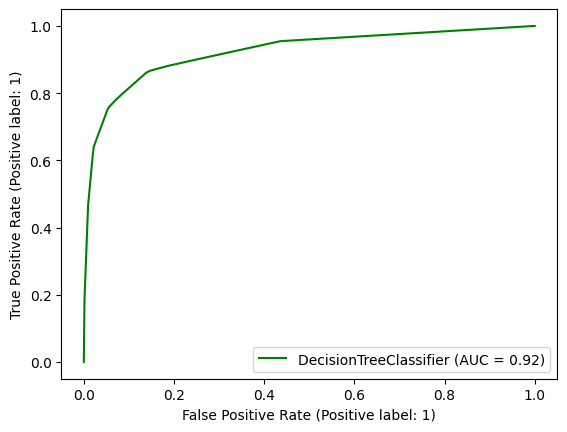

In [70]:
# Displaying the ROC curve for the baseline Decision Tree model on training data
RocCurveDisplay.from_estimator(base_decision_tree, X_train, y_train, color="green")


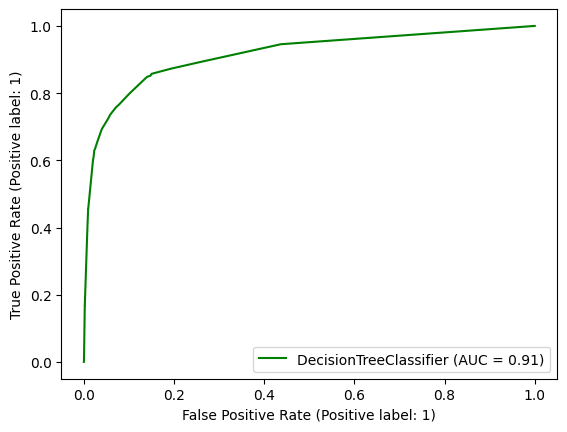

In [71]:
# Displaying the ROC curve for the baseline Decision Tree model on test data
RocCurveDisplay.from_estimator(base_decision_tree, X_test, y_test, color="green")

The foundational model exhibits commendable performance, surpassing the benchmark in recall metrics. Furthermore, it achieves AUC values over 90% for both the training and testing datasets, indicating strong predictive capability.

#### Optimizing Parameters to Identify the Optimal Model

In [72]:
# Defining the hyperparameters to tune
hyperparameters = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500]
}

# Setting up the Decision Tree Classifier for grid search
decision_tree_classifier = DecisionTreeClassifier(random_state=56)
optimal_model_search = GridSearchCV(estimator=decision_tree_classifier, 
                                    param_grid=hyperparameters, 
                                    cv=4, n_jobs=-1, verbose=1, scoring="accuracy")
optimal_model_search.fit(X_train, y_train)

# Displaying the best model configuration found
print(optimal_model_search.best_estimator_)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=56)


In [73]:
# Extracting the best Decision Tree model from the grid search
best_decision_tree = optimal_model_search.best_estimator_
best_decision_tree

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=56)

In [74]:
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=56)

In [75]:
# Evaluating the best Decision Tree model on training data
y_train_pred_optimal = best_decision_tree.predict(X_train)
evaluate_classification_model(y_train, y_train_pred_optimal)

Confusion Matrix:
 [[44653   919]
 [ 2014  3165]]
Accuracy = 0.94
Sensitivity/Recall = 0.61
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.77
Negative Predictive Value = 0.96


In [76]:
# Evaluating the best Decision Tree model on test data
y_test_pred_optimal = best_decision_tree.predict(X_test)
evaluate_classification_model(y_test, y_test_pred_optimal)

Confusion Matrix:
 [[14917   311]
 [  671  1018]]
Accuracy = 0.94
Sensitivity/Recall = 0.60
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.77
Negative Predictive Value = 0.96


#### Insights from the Decision Tree Model:

- The developed Decision Tree model excels across several key performance metrics.
- It achieves an impressive accuracy rate of 94%, coupled with a precision rate of 78% and a recall rate of 61% on the training dataset.
- The consistency of these metrics on the test dataset indicates that the model generalizes well to new data, showing no signs of overfitting.
- Specifically, when evaluated on the test dataset, the model's predictions are 94% accurate. It successfully identifies 60% of customers who are likely to churn (recall), and 77% of the predictions about customers churning are correct (precision).
- Overall, this model demonstrates robust performance and reliability.

#### Beyond overall accuracy, it's crucial for the model to accurately pinpoint customers at risk of churning. This specific performance measure is known as recall or sensitivity, as previously discussed.

### Classifier Using Random Forests

Given the success of the decision tree model, it's expected that the random forest approach will also perform effectively. Therefore, we will proceed directly to hyperparameter tuning to identify the optimal model configuration. To ensure computational efficiency, we've selected a concise set of parameters for tuning.

In [77]:
# Defining the set of parameters for hyperparameter tuning
hyperparameters = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500],
    'n_estimators': [10, 25, 50, 100]
}

# Setting up the Random Forest Classifier for the grid search
random_forest_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)
optimal_model_finder = GridSearchCV(estimator=random_forest_classifier, 
                                    param_grid=hyperparameters, 
                                    cv=4, n_jobs=-1, verbose=1, scoring="accuracy")
optimal_model_finder.fit(X_train, y_train)

# Displaying the best model configuration identified
print(optimal_model_finder.best_estimator_)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
RandomForestClassifier(max_depth=3, min_samples_leaf=50, n_jobs=-1,
                       random_state=42)


In [78]:
best_random_forest = optimal_model_finder.best_estimator_

In [79]:
best_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=50, n_jobs=-1,
                       random_state=42)

In [80]:
# Evaluating the best Random Forest model on training data
y_train_pred_optimal_rf = best_random_forest.predict(X_train)
evaluate_classification_model(y_train, y_train_pred_optimal_rf)

Confusion Matrix:
 [[44698   874]
 [ 2056  3123]]
Accuracy = 0.94
Sensitivity/Recall = 0.60
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.78
Negative Predictive Value = 0.96


In [81]:
# Evaluating the best Random Forest model on test data
y_test_pred_optimal_rf = best_random_forest.predict(X_test)
evaluate_classification_model(y_test, y_test_pred_optimal_rf)

Confusion Matrix:
 [[14932   296]
 [  685  1004]]
Accuracy = 0.94
Sensitivity/Recall = 0.59
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.77
Negative Predictive Value = 0.96


#### Insights from the Random Forest Model:

- The developed Random Forest model excels in key performance metrics, showing results comparable to those of the previously assessed Decision Tree model.
- It achieves an impressive accuracy rate of 94%, coupled with a precision rate of 78% and a recall rate of 60% on the training data.
- The consistency of these metrics on the test dataset indicates the model's robustness, demonstrating no signs of overfitting, making it suitable for application to new data.
- When evaluated against the test dataset, the model demonstrates 94% accuracy in its predictions, successfully identifying 59% of potential churners. Furthermore, 77% of the customers it predicts as churning are indeed churn cases.
- Overall, this model stands out as highly effective and reliable.

### Classifier Using XGBoost

We also experimented with the XGBoost algorithm, but found that conducting a GridSearchCV with it demanded excessive computational resources. Due to the extensive computation time required, we decided it was impractical for our purposes. 

Therefore, we will set aside the XGBoost approach for the time being and continue our analysis with the models we have already developed.

#### Among the various models evaluated, the Decision Tree and Random Forest have emerged as the top performers, delivering comparable results. Despite the simplicity of the Decision Tree, we prefer the Random Forest model to mitigate potential overfitting issues commonly associated with Decision Trees.

### Analyzing Key Features

Let's compile a DataFrame that captures the significance of each feature as determined by our most effective model to date, the Random Forest.

In [82]:
feature_importance_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance": best_random_forest.feature_importances_
})


In [83]:
sorted_feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
sorted_feature_importance_df

Variable  Importance
133             august_ic_mou_change    0.130308
126                  total_minutes_8    0.129613
80                    total_ic_mou_8    0.111424
53                    total_og_mou_8    0.097461
136               august_arpu_change    0.061546
134             august_og_mou_change    0.055228
95                  total_rech_amt_8    0.043384
129        incoming_outgoing_ratio_8    0.037726
2                             arpu_8    0.036597
65                      loc_ic_mou_8    0.030664
132               average_recharge_8    0.025424
59                  loc_ic_t2m_mou_8    0.022945
128        incoming_outgoing_ratio_7    0.017674
79                    total_ic_mou_7    0.017311
98                    max_rech_amt_8    0.016600
101               last_day_rch_amt_8    0.016176
20                  loc_og_t2m_mou_8    0.015168
125                  total_minutes_7    0.011659
8                       offnet_mou_8    0.009588
29                      loc_og_mou_8    0.007808
41                      std_og_mou_8    0.007503
104                      vol_2g_mb_8    0.006378
92                  total_rech_num_8    0.006350
135           august_rech_num_change    0.005895
35                  std_og_t2m_mou_8    0.005750
14                     roam_og_mou_8    0.005732
1                             arpu_7    0.005726
56                  loc_ic_t2t_mou_8    0.005533
17                  loc_og_t2t_mou_8    0.005350
11                     roam_ic_mou_8    0.004813
62                  loc_ic_t2f_mou_8    0.004805
71                  std_ic_t2m_mou_8    0.003816
139  only_incoming_calls_indicator_8    0.003717
64                      loc_ic_mou_7    0.003341
52                    total_og_mou_7    0.002769
5                        onnet_mou_8    0.002435
107                      vol_3g_mb_8    0.002392
32                  std_og_t2t_mou_8    0.002365
91                  total_rech_num_7    0.002266
77                      std_ic_mou_8    0.002007
124                  total_minutes_6    0.001765
68                  std_ic_t2t_mou_8    0.001471
13                     roam_og_mou_7    0.001247
94                  total_rech_amt_7    0.001066
106                      vol_3g_mb_7    0.001045
103                      vol_2g_mb_7    0.001015
47                      spl_og_mou_8    0.000993
74                  std_ic_t2f_mou_8    0.000946
121                       aug_vbc_3g    0.000735
127        incoming_outgoing_ratio_6    0.000702
10                     roam_ic_mou_7    0.000689
58                  loc_ic_t2m_mou_7    0.000452
120                              aon    0.000420
105                      vol_3g_mb_6    0.000413
4                        onnet_mou_7    0.000388
39                      std_og_mou_6    0.000364
51                    total_og_mou_6    0.000349
23                  loc_og_t2f_mou_8    0.000290
19                  loc_og_t2m_mou_7    0.000253
7                       offnet_mou_7    0.000252
40                      std_og_mou_7    0.000218
116                     monthly_3g_8    0.000193
78                    total_ic_mou_6    0.000183
110                     monthly_2g_8    0.000165
97                    max_rech_amt_7    0.000165
109                     monthly_2g_7    0.000107
100               last_day_rch_amt_7    0.000097
123                       jun_vbc_3g    0.000082
122                       jul_vbc_3g    0.000065
60                  loc_ic_t2f_mou_6    0.000057
131               average_recharge_7    0.000057
28                      loc_og_mou_7    0.000050
27                      loc_og_mou_6    0.000045
57                  loc_ic_t2m_mou_6    0.000044
54                  loc_ic_t2t_mou_6    0.000039
63                      loc_ic_mou_6    0.000037
15                  loc_og_t2t_mou_6    0.000032
22                  loc_og_t2f_mou_7    0.000029
130               average_recharge_6    0.000027
6                       offnet_mou_6    0.000025
115                     monthly_3g_7    0.000022
12        

The top 10 features account for approximately 70% of the model's predictive power. 

#### It's noteworthy that the leading two features among these are the derived metrics we formulated earlier.

### Implementing PCA (Principal Component Analysis)

Having identified the most important features, we'll now apply Principal Component Analysis (PCA) to streamline the feature set and reconstruct our optimal model for the final predictions.

In [90]:
pca_model = PCA(random_state=100)

In [91]:
pca_model.fit(X_train)

PCA(random_state=100)

In [92]:
pca_model.components_.shape

(140, 140)

In [93]:
cumulative_variance = np.cumsum(pca_model.explained_variance_ratio_)

#### Cumulative Variance Plot

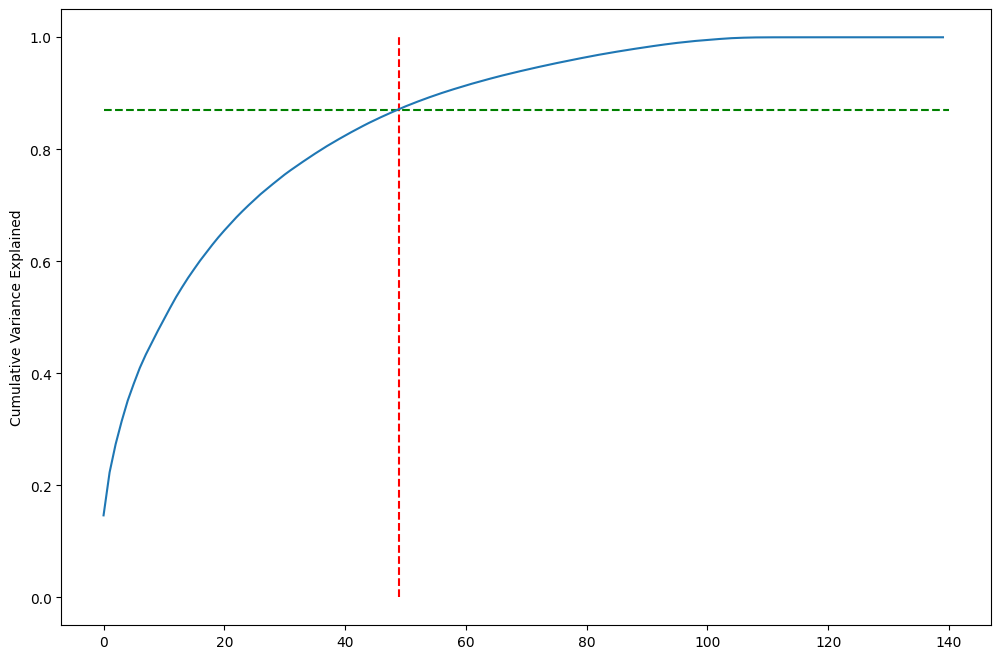

In [94]:
fig, ax = plt.subplots(figsize=[12,8])
ax.vlines(x=49, ymax=1, ymin=0, colors="r", linestyles="--")
ax.hlines(y=0.87, xmax=140, xmin=0, colors="g", linestyles="--")
ax.plot(cumulative_variance)
ax.set_ylabel("Cumulative Variance Explained")
plt.show()

Achieving a concise set of features was the goal, yet that hasn't been fully realized here.

Selecting the top 50 Principal Components (PCs) allows us to account for 87% of the dataset's variance, which is commendable.

Ideally, limiting ourselves to 15-20 PCs would be preferable, but this would result in significant information loss.

#### Given the still substantial number of PCs and the information compromise inherent to PCA, the resultant model might not substantially outperform our existing models.

In [95]:
pca_optimal = PCA(n_components=50, random_state=100)

In [96]:
X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(50751, 50)
(16917, 50)


### Implementing Logistic Regression with Principal Components

Let's construct a logistic regression model anew, utilizing the data transformed through PCA.

In [97]:
X_train_pca_with_const = sm.add_constant(X_train_pca)
logistic_model_pca_1 = sm.GLM(y_train, X_train_pca_with_const, family=sm.families.Binomial()).fit()
logistic_model_pca_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                50751
Model:                            GLM   Df Residuals:                    50700
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11531.
Date:                Wed, 10 Apr 2024   Deviance:                       23061.
Time:                        22:41:12   Pearson chi2:                 3.81e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1851
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8520      0.043    -88.786      0.000      -3.937      -3.767
x1            -0.3583      0.009    -40.960      0.000      -0.375      -0.341
x2            -0.2493      0.013    -19.612      0.000      -0.274      -0.224
x3             0.0303      0.013      2.350      0.019       0.005       0.056
x4            -0.2165      0.018    -11.931      0.000      -0.252      -0.181
x5            -0.2810      0.016    -17.138      0.000      -0.313      -0.249
x6             0.5425      0.011     49.546      0.000       0.521       0.564
x7             0.1581      0.014     11.518      0.000       0.131       0.185
x8            -0.0075      0.020     -0.381      0.703      -0.046       0.031
x9            -0.0109      0.014     -0.769      0.442      -0.039       0.017
x10           -0.2779      0.021    -13.132      0.000      -0.319      -0.236
x11            0.0030      0.017      0.173      0.862      -0.030       0.036
x12            0.0775      0.024      3.183      0.001       0.030       0.125
x13           -0.0104      0.022     -0.476      0.634      -0.053       0.033
x14            0.0287      0.030      0.960      0.337      -0.030       0.087
x15            0.0581      0.022      2.623      0.009       0.015       0.102
x16            0.0529      0.024      2.181      0.029       0.005       0.100
x17           -0.0477      0.027     -1.752      0.080      -0.101       0.006
x18           -0.3391      0.015    -22.714      0.000      -0.368      -0.310
x19           -0.0817      0.035     -2.342      0.019      -0.150      -0.013
x20           -0.0048      0.033     -0.147      0.883      -0.068       0.059
x21           -0.0666      0.027     -2.442      0.015      -0.120      -0.013
x22           -0.0320      0.027     -1.176      0.240      -0.085       0.021
x23           -0.0843      0.030     -2.782      0.005      -0.144      -0.025
x24            0.1001      0.023      4.375      0.000       0.055       0.145
x25           -0.3257      0.080     -4.074      0.000      -0.482      -0.169
x26           -0.2244      0.176     -1.277      0.202      -0.569       0.120
x27           -0.7082      0.069    -10.314      0.000      -0.843      -0.574
x28           -0.3289      0.034     -9.548      0.000      -0.396      -0.261
x29            0.0161      0.025      0.632      0.527      -0.034       0.066
x30           -0.1987      0.024     -8.126      0.000      -0.247      -0.151
x31            0.3515      0.038      9.267      0.000       0.277       0.426
x32            0.3235      0.028     11.415      0.000       0.268       0.379
x33           -0.0873      0.027     -3.183      0.001      -0.141      -0.034
x34           -0.8949      0.213     -4.200      0.000      -1.312      -0.477
x35           -0.0033      0.048     -0.069      0.945      -0.098       0.091
x3

In [98]:
y_train_pred_pca = logistic_model_pca_1.predict(X_train_pca_with_const)

In [99]:
# Generating predictions and evaluating the model using transformed PCA data
y_train_pred_pca = logistic_model_pca_1.predict(X_train_pca_with_const)
predicted_df_pca = pd.DataFrame(y_train_pred_pca, columns=['Predicted_Probability'])
predicted_df_pca['Predicted_Class'] = predicted_df_pca['Predicted_Probability'].apply(lambda prob: 1 if prob > 0.5 else 0)
evaluate_classification_model(y_train, predicted_df_pca['Predicted_Class'])

Confusion Matrix:
 [[44972   600]
 [ 4005  1174]]
Accuracy = 0.91
Sensitivity/Recall = 0.23
Specificity = 0.99
False Positive Rate = 0.01
Precision = 0.66
Negative Predictive Value = 0.92


The model's recall is disappointingly low, and with many coefficients not contributing significantly, further pruning could potentially worsen the performance, bringing us back to our starting point. Therefore, we'll shift our focus from logistic regression to exploring tree-based models.

### Decision Tree Classifier with Principal Components

In [100]:
# Setting up the hyperparameters for tuning
hyperparameters = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500]
}

# Initializing the Decision Tree Classifier for grid search
decision_tree_pca = DecisionTreeClassifier(random_state=56)
optimal_model_search_pca = GridSearchCV(estimator=decision_tree_pca, 
                                        param_grid=hyperparameters, 
                                        cv=4, n_jobs=-1, verbose=1, scoring="accuracy")
optimal_model_search_pca.fit(X_train_pca, y_train)

# Displaying the optimal model configuration
print(optimal_model_search_pca.best_estimator_)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
DecisionTreeClassifier(max_depth=9, min_samples_leaf=50, random_state=56)


In [101]:
best_decision_tree_pca = optimal_model_search_pca.best_estimator_

In [102]:
y_train_pred_pca_best = best_decision_tree_pca.predict(X_train_pca)
evaluate_classification_model(y_train, y_train_pred_pca_best)

Confusion Matrix:
 [[44628   944]
 [ 2948  2231]]
Accuracy = 0.92
Sensitivity/Recall = 0.43
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.70
Negative Predictive Value = 0.94


In [103]:
y_test_pred_pca_best = best_decision_tree_pca.predict(X_test_pca)
evaluate_classification_model(y_test, y_test_pred_pca_best)

Confusion Matrix:
 [[14802   426]
 [ 1068   621]]
Accuracy = 0.91
Sensitivity/Recall = 0.37
Specificity = 0.97
False Positive Rate = 0.03
Precision = 0.59
Negative Predictive Value = 0.93


The updated model, while based on the Decision Tree approach, underperforms in comparison to the optimal Decision Tree model we developed earlier. Additionally, its effectiveness appears to diminish when applied to the test dataset.

### Applying Random Forest Classifier with Principal Components

In [104]:
# Defining hyperparameters for optimization
hyperparameters_rf = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500],
    'n_estimators': [10, 25, 50, 100]
}

# Setting up Random Forest Classifier for grid search
random_forest_pca = RandomForestClassifier(random_state=42, n_jobs=-1)

optimal_rf_search = GridSearchCV(estimator=random_forest_pca, 
                                 param_grid=hyperparameters_rf, 
                                 cv=4, n_jobs=-1, verbose=1, scoring="accuracy")

optimal_rf_search.fit(X_train_pca, y_train)

# Displaying the best Random Forest model configuration
print(optimal_rf_search.best_estimator_)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


In [ ]:
best_random_forest_pca = optimal_rf_search.best_estimator_

In [ ]:
best_random_forest_pca.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=50, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [113]:
y_train_pred_pca_rf = best_random_forest_pca.predict(X_train_pca)
evaluate_classification_model(y_train, y_train_pred_pca_rf)

The confusion Matrix : 
 [[45473    99]
 [ 4573   606]]
Accuracy = 0.91
Sensitivity/Recall = 0.12
Specificity = 1.00
False Positive Rate = 0.00
Precision = 0.86
Negative Predictive Value = 0.91


In [ ]:
y_test_pred_pca_rf = best_random_forest_pca.predict(X_test_pca)
evaluate_classification_model(y_test, y_test_pred_pca_rf)


The confusion Matrix : 
 [[15182    46]
 [ 1516   173]]
Accuracy = 0.91
Sensitivity/Recall = 0.10
Specificity = 1.00
False Positive Rate = 0.00
Precision = 0.79
Negative Predictive Value = 0.91


Compared to the optimal Random Forest model developed earlier, this latest version demonstrates significantly weaker performance. Moreover, its effectiveness diminishes when applied to the test dataset, rendering it unsuitable for our needs.

## Step 4 - Final Model Selection and Validation with Additional Test Data

Therefore, we'll select the previously constructed Random Forest model, which does not utilize PCA, as our optimal choice. This model, which was also the basis for our feature importance analysis, stands out as the most suitable for our purposes.

This model achieved approximately 94% accuracy, 60% recall, and 77% precision, alongside 60% sensitivity and an impressive 98% specificity, marking it as a strong performer.

### Generating Predictions for Unseen Data in 'test.csv'

Data import, cleaning, and treatment.

In [115]:
# Import the data
tele = pd.read_csv("test.csv")
tele

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      69999        109             0.0             0.0             0.0   
1      70000        109             0.0             0.0             0.0   
2      70001        109             0.0             0.0             0.0   
3      70002        109             0.0             0.0             0.0   
4      70003        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
29995  99994        109             0.0             0.0             0.0   
29996  99995        109             0.0             0.0             0.0   
29997  99996        109             0.0             0.0             0.0   
29998  99997        109             0.0             0.0             0.0   
29999  99998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
29995            6/30/2014            7/31/2014            8/31/2014   
29996            6/30/2014            7/31/2014            8/31/2014   
29997            6/30/2014            7/31/2014            8/31/2014   
29998            6/30/2014            7/31/2014            8/31/2014   
29999            6/30/2014            7/31/2014            8/31/2014   

         arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0        91.882   65.330   64.445        31.78        20.23        23.11   
1       414.168  515.568  360.868        75.51        41.21        19.84   
2       329.844  434.884  746.239         7.54         7.86         8.40   
3        43.550  171.390   24.400         5.31         2.16         0.00   
4       306.854  406.289  413.329       450.93       609.03       700.68   
...         ...      ...      ...          ...          ...          ...   
29995   718.870  396.259  406.150       324.46       250.01       285.41   
29996   218.327  324.070  374.981       263.79       467.24       650.26   
29997   139.473   38.230  180.194        11.08        14.89        19.94   
29998  1122.912  781.121  257.439       122.74        50.23        26.46   
29999   318.980  307.890  605.320        28.09        32.93        66.31   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0             60.16         32.16         34.83           0.00           0.00   
1            474.34        621.84        394.94           0.00           0.00   
2             16.98         45.81         45.04          22.81         103.38   
3             40.04        205.01         24.01           0.00           0.00   
4             60.94         23.84         74.16           0.00           0.00   
...             ...           ...           ...            ...            ...   
29995        190.36        166.14        221.96          87.76          14.78   
29996        108.53        124.11        189.76           3.40           0.00   
29997         37.24         16.74         45.28           0.00           0.00   
29998       1854.09       1088.83        306.16           0.00          21.66   
29999        107.78        241.53        331.64         134.54          67.79   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00           0.00           0.00           0.00   
1               0.00           0.00           0.00           0.00   
2              26.08          24.53          53.68          54.44   
3               0.00           0.00           0.00           0.00   
4            

In [116]:
tele.shape

(30000, 171)

In [117]:
tele.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [118]:
# Drop duplicates
print(tele.shape)
tele2 = tele.drop_duplicates()
print(tele2.shape)

(30000, 171)
(30000, 171)


Dropping irrelevant or unnecessary columns

In [119]:
# Id type columns 
tele2 = tele2.drop(['id','circle_id'],axis=1)

# Columns containing last date of months
tele2 = tele2.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

# Columns which have only one value like zeros for all rows 
tele2 = tele2.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)
tele2 = tele2.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1)
tele2 = tele2.drop(['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

# We already have monthly reacharge counts and amounts so their dates aren't useful
tele2 = tele2.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)
tele2 = tele2.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1)

In [120]:
tele2.shape

(30000, 151)

#### Missing Value Treatment

In [121]:
# Missing value percentage in each column
round(tele2.isnull().sum()/len(tele2),3)*100

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            3.9
onnet_mou_7            3.9
onnet_mou_8            5.6
offnet_mou_6           3.9
offnet_mou_7           3.9
offnet_mou_8           5.6
roam_ic_mou_6          3.9
roam_ic_mou_7          3.9
roam_ic_mou_8          5.6
roam_og_mou_6          3.9
roam_og_mou_7          3.9
roam_og_mou_8          5.6
loc_og_t2t_mou_6       3.9
loc_og_t2t_mou_7       3.9
loc_og_t2t_mou_8       5.6
loc_og_t2m_mou_6       3.9
loc_og_t2m_mou_7       3.9
loc_og_t2m_mou_8       5.6
loc_og_t2f_mou_6       3.9
loc_og_t2f_mou_7       3.9
loc_og_t2f_mou_8       5.6
loc_og_t2c_mou_6       3.9
loc_og_t2c_mou_7       3.9
loc_og_t2c_mou_8       5.6
loc_og_mou_6           3.9
loc_og_mou_7           3.9
loc_og_mou_8           5.6
std_og_t2t_mou_6       3.9
std_og_t2t_mou_7       3.9
std_og_t2t_mou_8       5.6
std_og_t2m_mou_6       3.9
std_og_t2m_mou_7       3.9
std_og_t2m_mou_8       5.6
std_og_t2f_mou_6       3.9
s

Many columns have missing values and they are typically either low (up to around 5%) or very high (above 70%). We will drop all columns with high missing values (using a threshold of 50%).

In [122]:
drop_cols = tele2.columns[100*(tele2.isnull().sum()/len(tele2)) > 50]
print("Number of columns with high missing values = ",len(drop_cols))
print("\n List of columns to drop ->\n")
print(drop_cols)

Number of columns with high missing values =  27

 List of columns to drop ->

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')


In [123]:
# Dropping these columns
tele2 = tele2.drop(drop_cols,axis=1)
print(tele2.shape)

(30000, 124)


In [124]:
# Let's check out the columns with small missing percentages
small_cols = tele2.columns[100*(tele2.isnull().sum()/len(tele2)) > 0]
print("Number of columns with low but non-zero missing values = ",len(small_cols))
print("\n List of columns to treat ->\n")
print(small_cols)

Number of columns with low but non-zero missing values =  81

 List of columns to treat ->

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others

Visually studying the data, we didn't find any format issues or data shifting across columns which could have caused these missing values. 

Also, we see that these columns are all numeric and most of them have most of their values as zero. So, imputing with mean wouldn't be a good idea here. Let's go with median.

In [125]:
# Imputing missing values with median for all the remaining columns
for col in small_cols:
    tele2[col] = tele2[col].fillna(tele2[col].median())

In [126]:
# Final Check
tele2.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

In [127]:
tele2.shape

(30000, 124)

No missing values left. Let's proceed with next steps.

#### Derived Metrics Creation

Similar to train data -

In [128]:
# Total minutes of usage
tele2['total_mou_6'] = tele2['total_og_mou_6'] + tele2['total_ic_mou_6']
tele2['total_mou_7'] = tele2['total_og_mou_7'] + tele2['total_ic_mou_7']
tele2['total_mou_8'] = tele2['total_og_mou_8'] + tele2['total_ic_mou_8']

# Ratio of incoming to outgoing minutes of usage
tele2['ratio_ic_og_6'] = tele2['total_ic_mou_6']/tele2['total_og_mou_6']
tele2['ratio_ic_og_7'] = tele2['total_ic_mou_7']/tele2['total_og_mou_7']
tele2['ratio_ic_og_8'] = tele2['total_ic_mou_8']/tele2['total_og_mou_8']

# Average recharge amount
tele2['avg_rech_amt_6'] = tele2['total_rech_amt_6']/tele2['total_rech_num_6']
tele2['avg_rech_amt_7'] = tele2['total_rech_amt_7']/tele2['total_rech_num_7']
tele2['avg_rech_amt_8'] = tele2['total_rech_amt_8']/tele2['total_rech_num_8']

# Since August is action month and Jun-Jul were good months, we will create some metrics
# to store some key ratios of Aug value to average of Jun-Jul values
tele2['action_ic_mou_ratio'] = tele2['total_ic_mou_8']/np.mean([tele2['total_ic_mou_6'],tele2['total_ic_mou_7']])
tele2['action_og_mou_ratio'] = tele2['total_og_mou_8']/np.mean([tele2['total_og_mou_6'],tele2['total_og_mou_7']])
tele2['action_rech_num_ratio'] = tele2['total_rech_num_8']/np.mean([tele2['total_rech_num_6'],tele2['total_rech_num_7']])
tele2['action_arpu_ratio'] = tele2['arpu_8']/np.mean([tele2['arpu_6'],tele2['arpu_7']])

In [129]:
# Checking new column's values

print("Null or NA values -> \n")
print(tele2.isnull().sum())

print("\nInfinite values due to division by zero ->\n")
print((tele2 == np.inf).sum())

Null or NA values -> 

arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
loc_og_mou_6                0
loc_og_mou_7                0
loc_og_mou_8                0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t_mou_8 

In [130]:
# Imputing missing values with zeros
miss_list = ['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','ratio_ic_og_6','ratio_ic_og_7','ratio_ic_og_8']

for col in miss_list:
    tele2[col] = tele2[col].fillna(0)

In [131]:
# Imputing infinite values with zeros and creating an indicator column for only incoming customers

tele2['only_ic_ind_6'] = 0
tele2.loc[tele2['ratio_ic_og_6']==np.inf,'only_ic_ind_6'] = 1
tele2.loc[tele2['ratio_ic_og_6']==np.inf,'ratio_ic_og_6'] = 0

tele2['only_ic_ind_7'] = 0
tele2.loc[tele2['ratio_ic_og_7']==np.inf,'only_ic_ind_7'] = 1
tele2.loc[tele2['ratio_ic_og_7']==np.inf,'ratio_ic_og_7'] = 0

tele2['only_ic_ind_8'] = 0
tele2.loc[tele2['ratio_ic_og_8']==np.inf,'only_ic_ind_8'] = 1
tele2.loc[tele2['ratio_ic_og_8']==np.inf,'ratio_ic_og_8'] = 0

In [132]:
# Re-checking new column's values

print("Null or NA values -> \n")
print(tele2.isnull().sum())

print("\nInfinite values due to division by zero ->\n")
print((tele2 == np.inf).sum())

Null or NA values -> 

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
std_o

#### Outliers Treatment

We won't be removing any outliers since we are required to provide predictions on all 30,000 rows. Hence, we can't drop any rows.

#### Data Preparation

1. We have some categorical columns which we created in 1/0 format so no need of any manipulation there.
2. Other than that, we have lots of numerical columns which will need to be scaled after train-test split.

In [133]:
X_test_new = tele2.copy()

In [136]:
# Scaling the new test dataset using previously fitted scaler
varlist = X_test_new.columns
X_test_new[varlist] = scaler.transform(X_test_new[varlist])

In [137]:
X_test_new.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.712176 -0.809737 -0.802204    -0.357029    -0.400291    -0.385973   
1  0.706246  1.199710  0.490121    -0.162506    -0.307960    -0.400490   
2  0.335125  0.839611  2.170235    -0.464854    -0.454730    -0.451275   
3 -0.924891 -0.336383 -0.976789    -0.474774    -0.479816    -0.488565   
4  0.233943  0.711989  0.718837     1.507457     2.190966     2.621955   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.470742     -0.576187     -0.559641      -0.163569      -0.113756   
1      1.254800      1.883471      0.936850      -0.163569      -0.113756   
2     -0.650638     -0.519250     -0.517212       0.296804       1.894733   
3     -0.554566      0.144800     -0.604605      -0.163569      -0.113756   
4     -0.467493     -0.610891     -0.396199      -0.163569      -0.113756   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.118683      -0.214726      -0.183569      -0.172997   
1      -0.118683      -0.214726      -0.183569      -0.172997   
2       0.421378       0.258908       1.109202       1.106539   
3      -0.118683      -0.214726      -0.183569      -0.172997   
4      -0.118683      -0.214726      -0.183569      -0.172997   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.143113         -0.181779         -0.174820         -0.499147   
1          0.360737          0.026629         -0.187373          2.953096   
2         -0.390709         -0.382736         -0.391501         -0.636560   
3         -0.337866         -0.382736         -0.391501         -0.614277   
4         -0.386231         -0.374988         -0.241697         -0.618445   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.561195         -0.584414         -0.292845          0.912715   
1          4.082099          2.359798         -0.227764         -0.294042   
2         -0.647310         -0.651136         -0.292845         -0.294042   
3          0.132464         -0.487444         -0.292845         -0.294042   
4         -0.626275         -0.563823         -0.292845         -0.294042   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.287674         -0.198814          -0.17283         -0.202372   
1         -0.287674         -0.198814          -0.17283         -0.207103   
2         -0.287674         -0.198814          -0.17283         -0.207103   
3         -0.075159         -0.198814           0.67328         -0.207103   
4         -0.287674         -0.198814          -0.17283         -0.207103   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.438880     -0.425888     -0.512831         -0.303251   
1      2.208702      2.761045      1.492891         -0.337792   
2     -0.663547     -0.665533     -0.673374         -0.337792   
3     -0.620400     -0.136986     -0.548671         -0.337792   
4     -0.648712     -0.647095     -0.534215          1.917270   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.338552         -0.325480         -0.157692         -0.337575   
1         -0.338552         -0.335603         -0.373484         -0.256135   
2         -0.338552         -0.335603         -0.373484         -0.376472   
3         -0.327915         -0.335603         -0.183055          0.101433   
4          2.656701          3.052581         -0.072926         -0.269202   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.236103         -0.145794         -0.127973         -0.132748   
1         -0.280069         -0.145794         -0.127973         -0.132748   
2         -0.368905         -0.145794         -0.127973         -0.132748   
3         -0.368905         -0.145794         -0.127973         -0.132748   
4         -0.051446         -0.145794         -0.127973         -0.132748   



In [138]:
X_test_new.shape

(30000, 140)

At this point, the new test data is ready to be fed into the model.

#### Predictions using best model

In [139]:
y_test_new_pred = rfc_best.predict(X_test_new)

In [140]:
y_test_new_pred

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
pd.DataFrame(y_test_new_pred).value_counts()

0    27622
1     2378
Name: count, dtype: int64

In [144]:
2378/(30000)

0.07926666666666667

We predicted 8% as churn which seems reasonable compared against overall churn rate (10%).

#### Creating the submission file

In [147]:
submission = tele[['id']]

In [149]:
submission['churn_probability'] = y_test_new_pred

In [150]:
submission

id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  1
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]

In [151]:
# Double checking
submission['churn_probability'].value_counts()

churn_probability
0    27622
1     2378
Name: count, dtype: int64

In [154]:
# Output file
submission.to_csv("Submission.csv",index=False)